# EDA và Trực quan hóa dữ liệu bán hàng AMAZON

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_palette("husl")

In [378]:
df = pd.read_csv('Amazon_SaleData_Cleaned.csv')
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Tạo các biến phụ trợ cho phân tích
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Quarter'] = df['OrderDate'].dt.quarter
df['YearMonth'] = df['OrderDate'].dt.to_period('M')
df['DayOfWeek'] = df['OrderDate'].dt.day_name()
df['MonthName'] = df['OrderDate'].dt.month_name()
df['DayOfMonth'] = df['OrderDate'].dt.day
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,SellerID,day_of_week,Revenue,Year,Month,Quarter,YearMonth,DayOfWeek,MonthName,DayOfMonth
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,SELL01967,1,319.86,2023,1,1,2023-01,Tuesday,January,31
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,SELL01298,5,259.64,2023,12,4,2023-12,Saturday,December,30
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,SELL00908,1,108.06,2022,5,2,2022-05,Tuesday,May,10
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,SELL01164,1,159.66,2023,7,3,2023-07,Tuesday,July,18
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,SELL01411,5,0.00,2023,2,1,2023-02,Saturday,February,4


### 1. Phân tích phân phối của các biến số để hiểu đặc điểm dữ liệu và phát hiện các pattern bất thường.



In [379]:
numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount']
df[numeric_cols].describe()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.073232,64.616423,7.406660,915.591017
std,1.413548,171.840797,0.080123,61.802319,4.324057,716.753187
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.250000,216.270000,15.000000,2863.077500


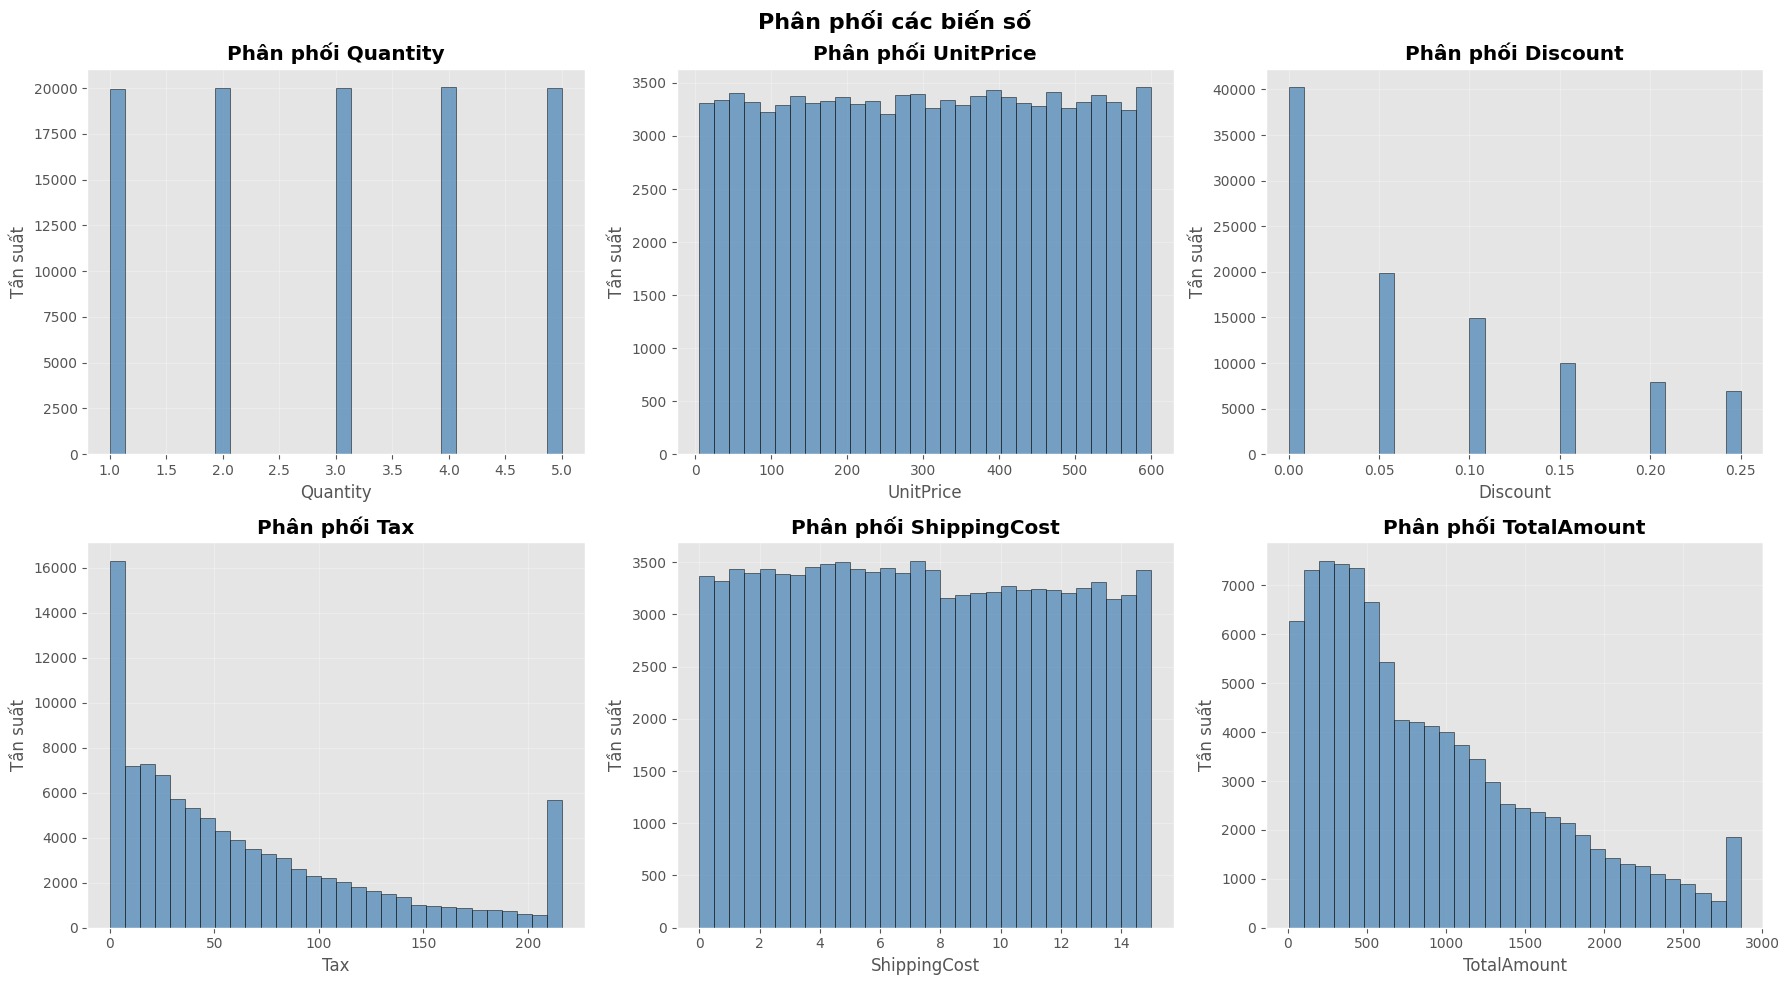

In [380]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Phân phối các biến số", fontsize=16, fontweight="bold")

for ax, col in zip(axes.flat, numeric_cols):
    ax.hist(df[col], bins=30, color="steelblue", edgecolor="black", alpha=0.7)
    ax.set_title(f"Phân phối {col}", fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Tần suất")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2. Phân tích mối tương quan giữa các biến số để xác định các mối quan hệ tuyến tính và phát hiện các biến có tương quan cao.

In [381]:
correlation_matrix = df[numeric_cols].corr()
correlation_matrix

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
Quantity,1.000000,0.004408,-0.000821,0.454783,0.020047,0.596107
UnitPrice,0.004408,1.000000,0.005768,0.557607,0.045773,0.717691
Discount,-0.000821,0.005768,1.000000,-0.076056,0.000447,-0.106461
Tax,0.454783,0.557607,-0.076056,1.000000,0.026898,0.793368
ShippingCost,0.020047,0.045773,0.000447,0.026898,1.000000,0.039769
TotalAmount,0.596107,0.717691,-0.106461,0.793368,0.039769,1.000000


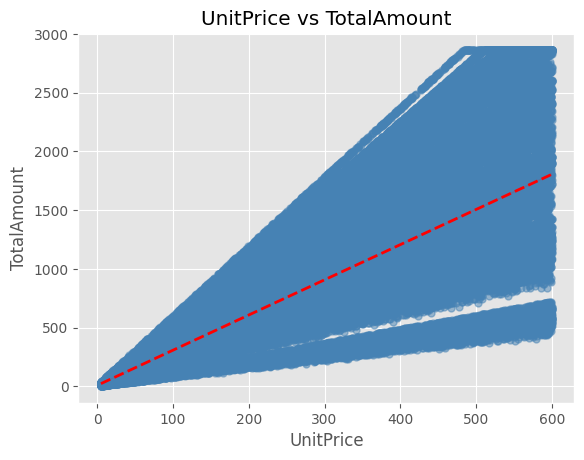

In [382]:
sns.regplot(x="UnitPrice", y="TotalAmount", data=df,
    scatter_kws={"color": "steelblue", "alpha": 0.5, "s": 25},
    line_kws={"color": "red", "linewidth": 2, "linestyle": "--"}
)

plt.title("UnitPrice vs TotalAmount")
plt.show()


**Nhận xét**: Biểu đồ cho thấy mối quan hệ đồng biến giữa UnitPrice và TotalAmount. Khi giá đơn vị tăng, giá trị đơn hàng có xu hướng tăng theo.

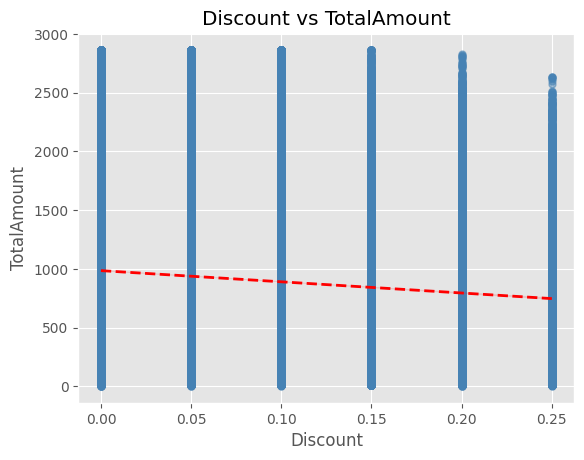

In [383]:
sns.regplot(x="Discount", y="TotalAmount", data=df,
    scatter_kws={"color": "steelblue", "alpha": 0.5, "s": 25},
    line_kws={"color": "red", "linewidth": 2, "linestyle": "--"}
)

plt.title('Discount vs TotalAmount')
plt.show()

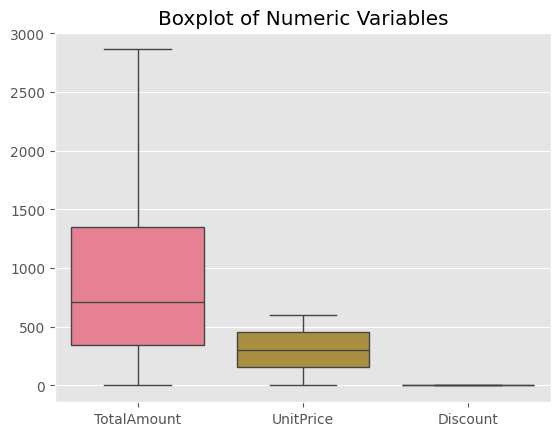

In [384]:
sns.boxplot(data=df[['TotalAmount', 'UnitPrice', 'Discount']])
plt.title('Boxplot of Numeric Variables')
plt.show()

**Nhận xét**: 
- TotalAmount có độ phân tán lớn và xuất hiện nhiều giá trị ngoại lai ở phía trên, phản ánh phân phối lệch phải mạnh.
- UnitPrice có độ phân tán vừa phải với một số ít outlier giá cao, trong khi Discount chủ yếu tập trung gần 0 và chỉ có một số trường hợp giảm giá lớn.

### 3. So sánh các chỉ số trung bình (doanh thu, số lượng, giá) theo từng danh mục sản phẩm để xác định danh mục nào có hiệu suất tốt nhất.

In [385]:
category_stats = df.groupby('Category').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean',
    'UnitPrice': 'mean'
}).round(2)
category_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB', 'Giá TB']
category_stats = category_stats.sort_values('Tổng doanh thu', ascending=False)
category_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB,Giá TB
Category,,,,,
Electronics,921.63,15532261.90,16853,3.01,302.93
Sports & Outdoors,910.73,15303979.70,16804,3.01,301.76
Books,908.54,15219921.88,16752,2.98,302.02
Clothing,925.29,15210784.54,16439,3.01,305.20
Toys & Games,917.36,15175021.60,16542,3.01,302.81
Home & Kitchen,910.12,15117132.11,16610,2.99,302.76


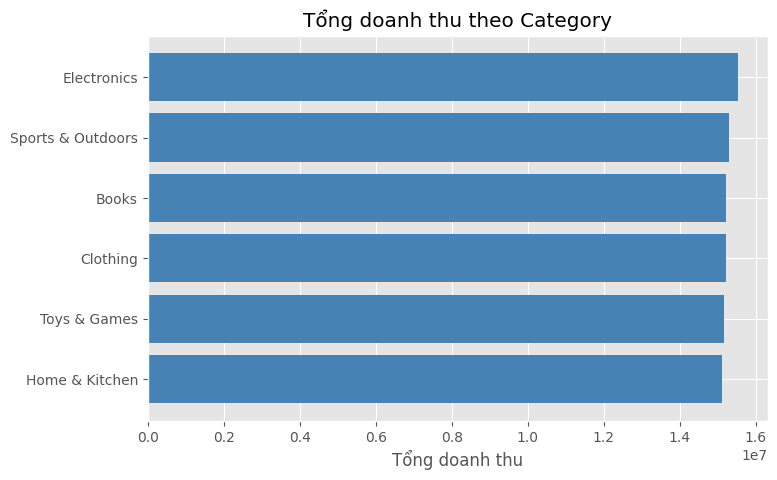

In [386]:
plt.figure(figsize=(8, 5))
plt.barh(category_stats.index, category_stats['Tổng doanh thu'], color='steelblue')
plt.title('Tổng doanh thu theo Category')
plt.xlabel('Tổng doanh thu')
plt.gca().invert_yaxis()
plt.show()

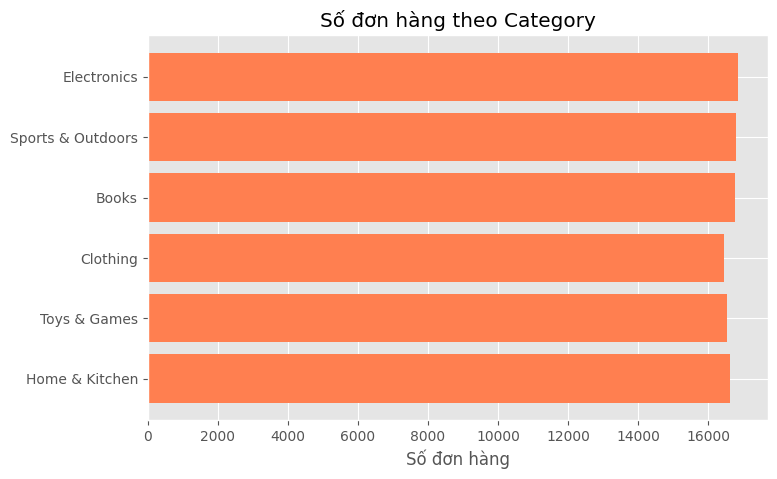

In [387]:
plt.figure(figsize=(8, 5))
plt.barh(category_stats.index, category_stats['Số đơn hàng'], color='coral')
plt.title('Số đơn hàng theo Category')
plt.xlabel('Số đơn hàng')
plt.gca().invert_yaxis()

### 4. So sánh hiệu suất bán hàng giữa các quốc gia để xác định thị trường nào đóng góp nhiều nhất vào doanh thu.

In [388]:
country_stats = df.groupby('Country').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean'
}).round(2)
country_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB']
country_stats = country_stats.sort_values('Tổng doanh thu', ascending=False)
country_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB
Country,,,,
United States,915.34,64127016.14,70058,3.00
India,919.06,13832831.01,15051,3.00
Canada,912.17,5306984.37,5818,2.99
United Kingdom,913.66,4516245.89,4943,3.00
Australia,914.29,3776024.32,4130,3.01


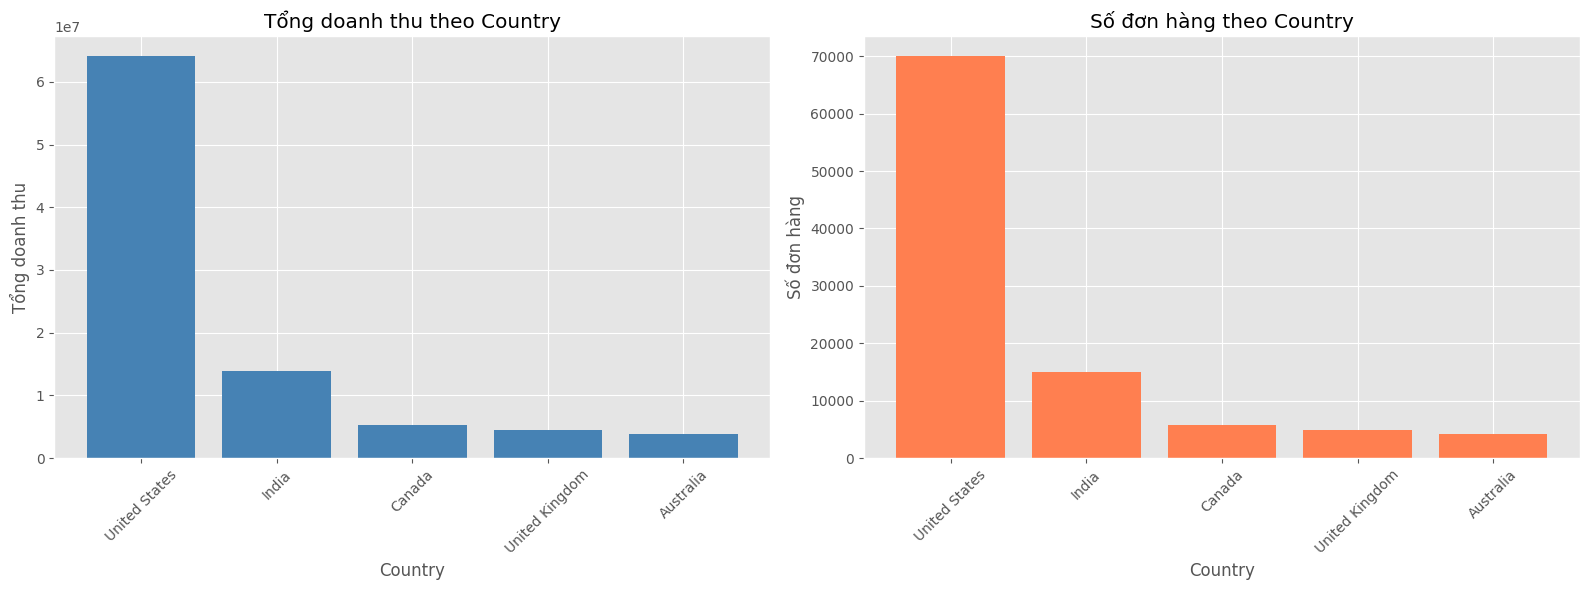

In [389]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(country_stats.index, country_stats['Tổng doanh thu'], color='steelblue')
axes[0].set_title('Tổng doanh thu theo Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Tổng doanh thu')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(country_stats.index, country_stats['Số đơn hàng'], color='coral')
axes[1].set_title('Số đơn hàng theo Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Số đơn hàng')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

### 5. OrderStatus

Phân tích tỷ lệ các trạng thái đơn hàng để đánh giá hiệu quả xử lý đơn hàng và tỷ lệ hủy/trả hàng.

In [390]:
status_counts = df['OrderStatus'].value_counts()
status_percentage = (df['OrderStatus'].value_counts(normalize=True) * 100).round(2)
status_df = pd.DataFrame({
    'Số lượng': status_counts,
    'Tỷ lệ (%)': status_percentage
})
status_df

,Số lượng,Tỷ lệ (%)
OrderStatus,,
Delivered,74628,74.63
Shipped,15192,15.19
Pending,4103,4.10
Returned,3049,3.05
Cancelled,3028,3.03


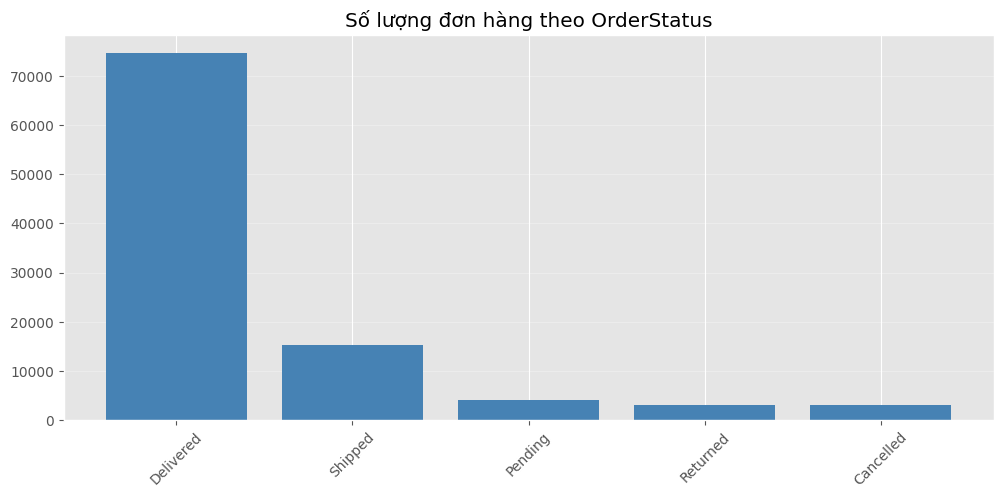

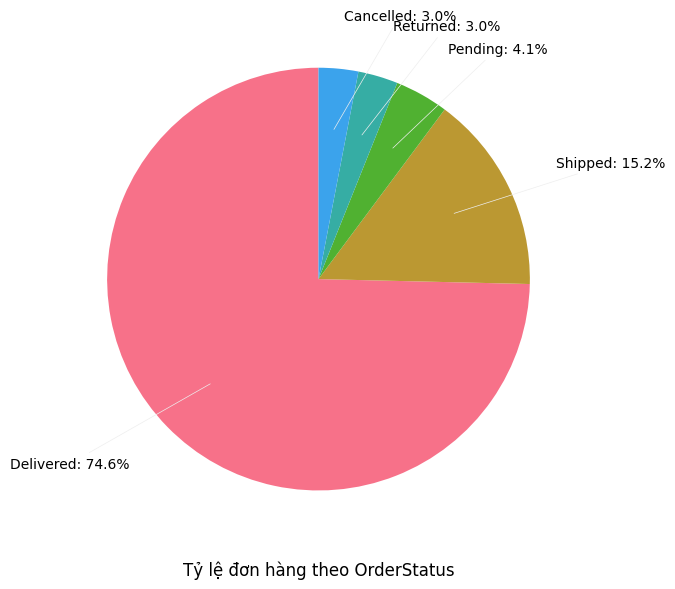

In [391]:
import numpy as np

plt.figure(figsize=(12, 5))
plt.bar(status_df.index, status_df['Số lượng'], color='steelblue')
plt.title('Số lượng đơn hàng theo OrderStatus')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.show()


v = status_df['Số lượng'].values
l = status_df.index
p = v / v.sum() * 100

plt.figure(figsize=(6, 6))
w, _ = plt.pie(v, startangle=90)

for i, x in enumerate(w):
    a = (x.theta1 + x.theta2) / 2
    c, s = np.cos(np.deg2rad(a)), np.sin(np.deg2rad(a))
    plt.annotate(f'{l[i]}: {p[i]:.1f}%', xy=(c*0.7, s*0.7), xytext=(c*1.25, s*1.25),
                 arrowprops=dict(arrowstyle='-'), ha='left' if c > 0 else 'right', va='center')

plt.text(0, -1.4, 'Tỷ lệ đơn hàng theo OrderStatus', ha='center', fontsize=12)
plt.axis('equal'); plt.show()

In [392]:
payment_stats = df.groupby('PaymentMethod').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean'
}).round(2)
payment_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB']
payment_stats = payment_stats.sort_values('Tổng doanh thu', ascending=False)
payment_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB
PaymentMethod,,,,
Credit Card,914.07,32027332.44,35038,3.00
Debit Card,923.09,18483919.35,20024,3.01
Upi,919.48,13852838.15,15066,3.00
Amazon Pay,909.69,13660850.33,15017,3.00
Net Banking,909.76,9031188.94,9927,2.99
Cash On Delivery,913.75,4502972.52,4928,3.01


## 7. Phân tích theo thời gian

Phân tích xu hướng doanh thu và số lượng đơn hàng theo thời gian để phát hiện các mùa cao điểm và xu hướng tăng trưởng.

In [393]:
time_stats = df.groupby('Year').agg({
    'TotalAmount': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)
time_stats.columns = ['Tổng doanh thu', 'Doanh thu TB', 'Tổng số lượng']
time_stats

,Tổng doanh thu,Doanh thu TB,Tổng số lượng
Year,,,
2020,18473605.98,920.64,60208
2021,18199379.20,915.00,59641
2022,18313213.14,912.10,60126
2023,18463967.54,918.79,60577
2024,18108935.88,911.37,59588


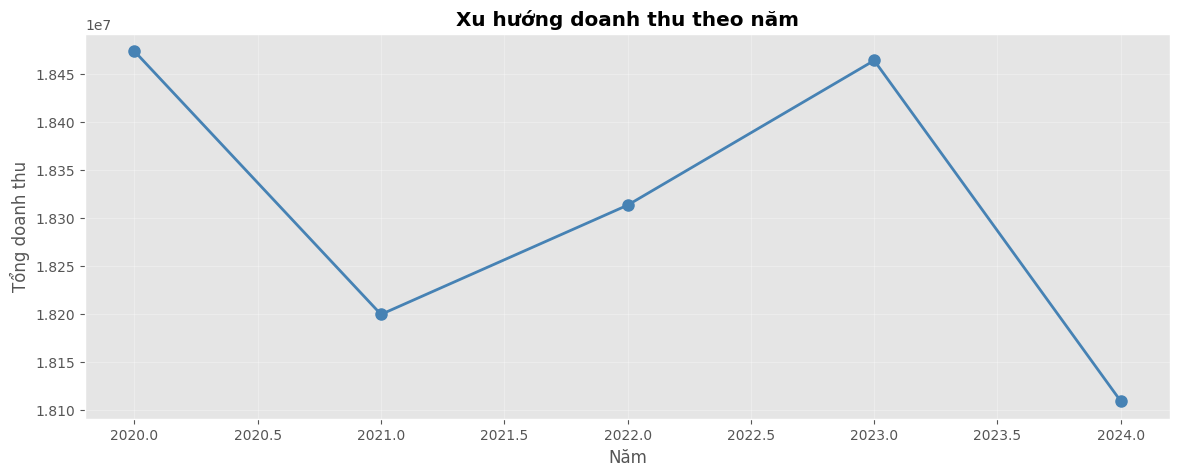

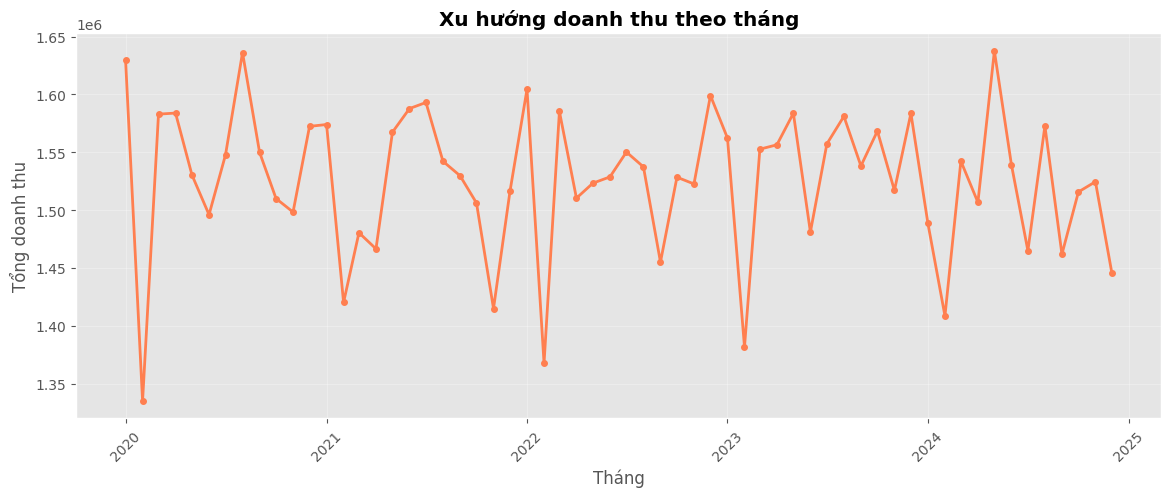

In [394]:
plt.figure(figsize=(14, 5))
plt.plot(time_stats.index, time_stats['Tổng doanh thu'],
         marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Xu hướng doanh thu theo năm', fontweight='bold')
plt.xlabel('Năm'); plt.ylabel('Tổng doanh thu')
plt.grid(True, alpha=0.3)
plt.show()


plt.figure(figsize=(14, 5))

monthly_stats = df.groupby(['Year', 'Month']).agg({'TotalAmount': 'sum'}).reset_index()
monthly_stats['Date'] = pd.to_datetime(monthly_stats[['Year', 'Month']].assign(Day=1))
monthly_stats = monthly_stats.sort_values('Date')

plt.plot(monthly_stats['Date'], monthly_stats['TotalAmount'],
         marker='o', linewidth=2, markersize=4, color='coral')
plt.title('Xu hướng doanh thu theo tháng', fontweight='bold')
plt.xlabel('Tháng'); plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


### 6. Discount và TotalAmount

Phân tích mối quan hệ giữa mức giảm giá và doanh thu để đánh giá hiệu quả của các chương trình khuyến mãi.

In [395]:
discount_analysis = df.groupby(pd.cut(df['Discount'], bins=[0, 0.05, 0.1, 0.15, 0.2, 0.3, 1])).agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'Quantity': 'mean'
}).round(2)
discount_analysis.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Số lượng TB']
discount_analysis

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Số lượng TB
Discount,,,,
"(0.0, 0.05]",940.62,18708061.66,19889,3.00
"(0.05, 0.1]",897.61,13383296.60,14910,3.00
"(0.1, 0.15]",841.60,8450469.58,10041,3.00
"(0.15, 0.2]",793.68,6301022.17,7939,2.99
"(0.2, 0.3]",741.00,5168499.18,6975,3.01
"(0.3, 1.0]",NaN,0.00,0,NaN


**Nhận xét**: Khoảng giảm giá cao có rất ít quan sát nên kết quả không đáng tin.

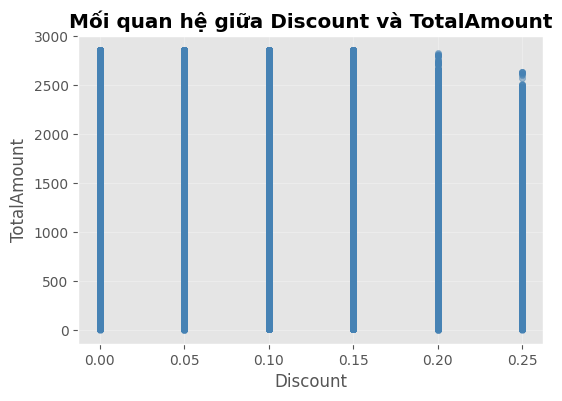

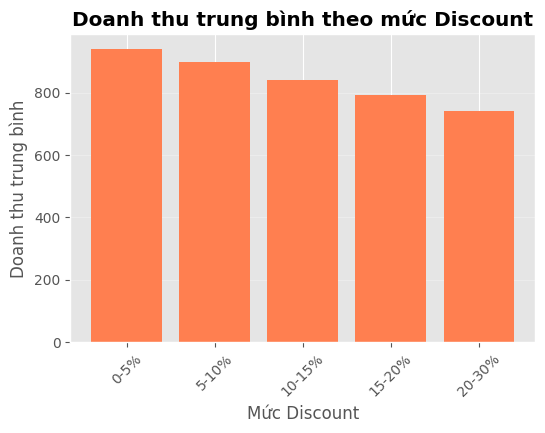

In [396]:
# Biểu đồ 1: Scatter
plt.figure(figsize=(6, 4))
plt.scatter(df['Discount'], df['TotalAmount'], alpha=0.5, s=20, color='steelblue')
plt.title('Mối quan hệ giữa Discount và TotalAmount', fontweight='bold')
plt.xlabel('Discount'); plt.ylabel('TotalAmount')
plt.grid(True, alpha=0.3)
plt.show()


# Biểu đồ 2: Bar theo discount bin
discount_bins = pd.cut(df['Discount'],
                        bins=[0, 0.05, 0.1, 0.15, 0.2, 0.3, 1],
                        labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-30%', '30%+'])
discount_grouped = df.groupby(discount_bins)['TotalAmount'].mean()

plt.figure(figsize=(6, 4))
plt.bar(discount_grouped.index.astype(str), discount_grouped.values, color='coral')
plt.title('Doanh thu trung bình theo mức Discount', fontweight='bold')
plt.xlabel('Mức Discount'); plt.ylabel('Doanh thu trung bình')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()


### 7. So sánh hiệu suất của các thương hiệu để xác định các brand phổ biến nhất và có doanh thu cao nhất.

In [397]:
brand_stats = df.groupby('Brand').agg({
    'TotalAmount': ['mean', 'sum', 'count'],
    'UnitPrice': 'mean',
    'Quantity': 'mean'
}).round(2)
brand_stats.columns = ['Doanh thu TB', 'Tổng doanh thu', 'Số đơn hàng', 'Giá TB', 'Số lượng TB']
brand_stats = brand_stats.sort_values('Tổng doanh thu', ascending=False).head(10)
brand_stats

,Doanh thu TB,Tổng doanh thu,Số đơn hàng,Giá TB,Số lượng TB
Brand,,,,,
CoreTech,919.91,9315884.73,10127,302.66,3.00
KiddoFun,922.24,9293453.28,10077,302.93,2.99
ReadMore,906.25,9247328.48,10204,301.70,2.98
UrbanStyle,935.83,9221654.50,9854,304.78,3.06
Zenith,921.81,9208900.93,9990,305.00,3.01
Apex,917.81,9120319.62,9937,302.64,3.01
NexPro,909.20,9057463.91,9962,302.16,2.99
FitLife,890.95,9040427.45,10147,299.43,2.97
BrightLux,911.71,9032330.98,9907,303.49,2.99


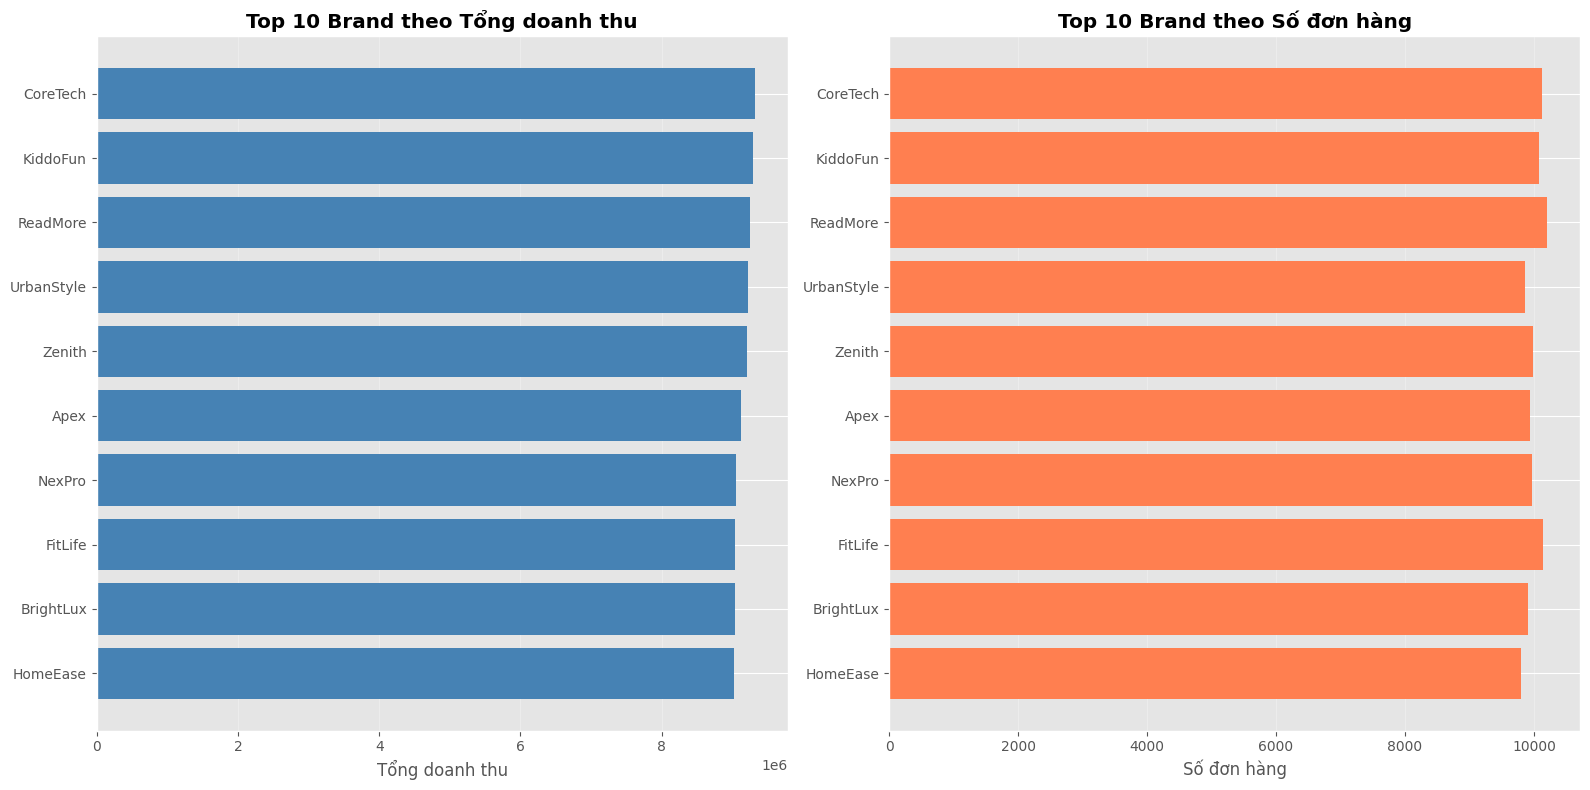

In [398]:
plt.figure(figsize=(16, 8))

# Biểu đồ 1: Tổng doanh thu theo Brand
plt.subplot(1, 2, 1)
plt.barh(brand_stats.index, brand_stats['Tổng doanh thu'], color='steelblue')
plt.title('Top 10 Brand theo Tổng doanh thu', fontweight='bold')
plt.xlabel('Tổng doanh thu')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Biểu đồ 2: Số đơn hàng theo Brand
plt.subplot(1, 2, 2)
plt.barh(brand_stats.index, brand_stats['Số đơn hàng'], color='coral')
plt.title('Top 10 Brand theo Số đơn hàng', fontweight='bold')
plt.xlabel('Số đơn hàng')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout(); plt.show()


### 8. Bảng phân phối của tổng doanh thu:

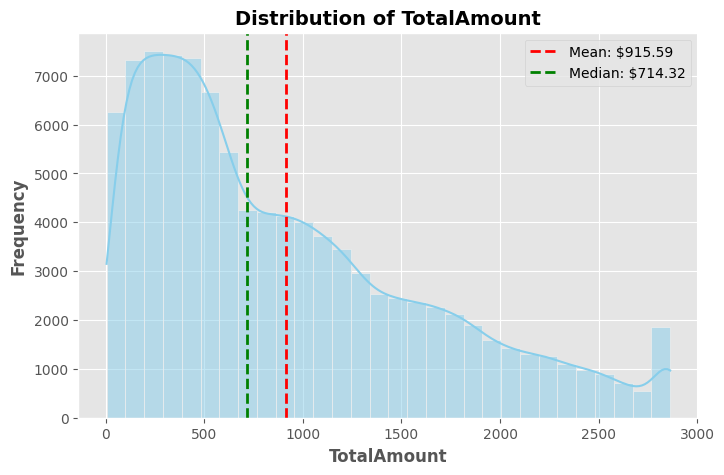

In [399]:
plt.figure(figsize=(8,5))
sns.histplot(df["TotalAmount"].dropna(), bins=30, kde=True, color="skyblue")

mean_val = df["TotalAmount"].mean(); median_val = df["TotalAmount"].median()

plt.axvline(mean_val, color="red", ls="--", lw=2, label=f"Mean: ${mean_val:,.2f}")
plt.axvline(median_val, color="green", ls="--", lw=2, label=f"Median: ${median_val:,.2f}")

plt.title("Distribution of TotalAmount", fontsize=14, fontweight="bold")
plt.xlabel("TotalAmount", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.legend(fontsize=10)
plt.show()



**Nhận xét:**

-  Biểu đồ phân phối tổng doanh thu (TotalAmount) cho thấy dữ liệu không tuân theo phân phối chuẩn, có độ lệch phải rõ rệt (right-skewed), với đuôi kéo dài về phía các giá trị doanh thu lớn.

- Giá trị mean ($918.26) lớn hơn median ($714.32), cho thấy tồn tại một số đơn hàng có doanh thu rất cao làm kéo trung bình lên, trong khi phần lớn đơn hàng có doanh thu ở mức trung bình–thấp.

- Phần lớn đơn hàng tập trung trong khoảng doanh thu từ 0 đến 1,000 USD, trong khi các đơn có doanh thu trên 2,000 USD chiếm tỷ lệ nhỏ nhưng có ảnh hưởng đáng kể đến tổng doanh thu.

- Sự chênh lệch giữa mean và median cho thấy việc sử dụng median có thể phản ánh tốt hơn giá trị điển hình của đơn hàng, đặc biệt trong các phân tích so sánh hoặc mô hình dự đoán

### 9. Liệu các biến payment method, discount và total amount có ảnh hưởng đến khả năng hoàn thành của đơn hàng hay không?

Tỷ lệ NotDelivered toàn bộ: 6.08%


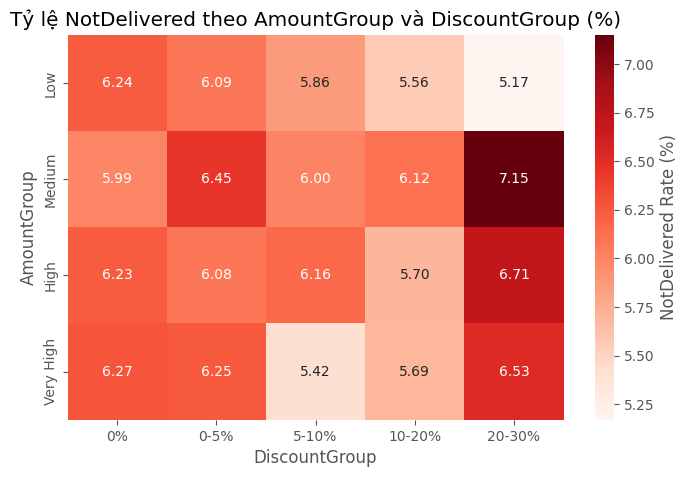

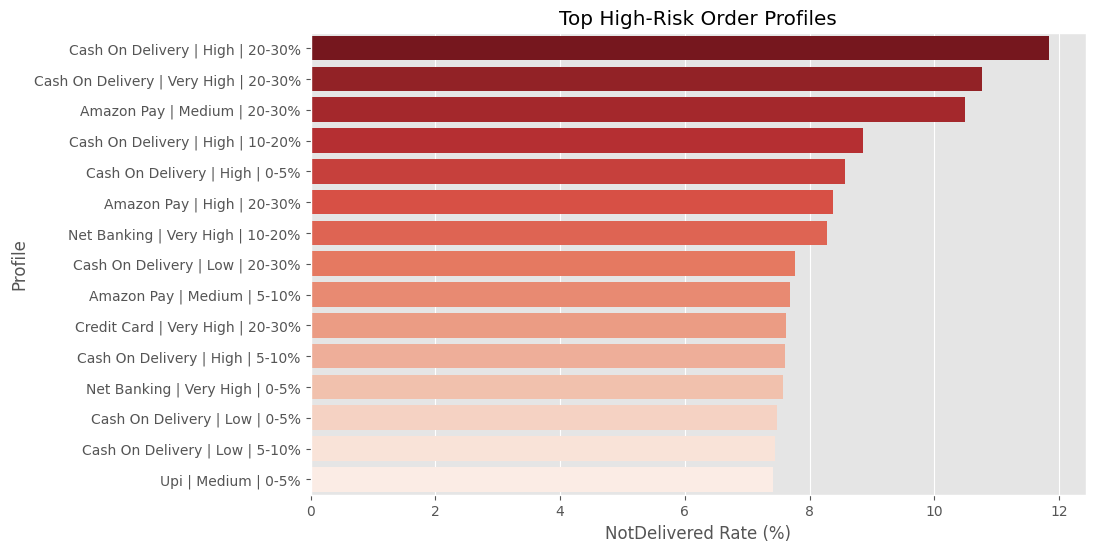

In [400]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# 1. Đánh dấu đơn hàng NotDelivered (Cancelled hoặc Returned)
df["NotDelivered"] = df["OrderStatus"].isin(["Cancelled","Returned"]).astype(int)

# 2. Chia nhóm TotalAmount theo quartile
df["AmountGroup"] = pd.qcut(df["TotalAmount"], 4, labels=["Low","Medium","High","Very High"])

# 3. Chia nhóm Discount theo ngưỡng
discount_bins = [-0.001,0,0.05,0.10,0.20,0.30]
discount_labels = ["0%","0-5%","5-10%","10-20%","20-30%"]
df["DiscountGroup"] = pd.cut(df["Discount"], bins=discount_bins, labels=discount_labels, include_lowest=True)

# 4. Tính profile theo AmountGroup, DiscountGroup, và PaymentMethod
profile = (df.groupby(["AmountGroup","DiscountGroup","PaymentMethod"], observed=True)
             .agg(Orders=("OrderID","count"),
                  NotDeliveredRate=("NotDelivered","mean"),
                  AvgAmount=("TotalAmount","mean"))
             .reset_index())

# Làm tròn các giá trị
profile["NotDeliveredRate%"] = (profile["NotDeliveredRate"]*100).round(2)
profile["AvgAmount"] = profile["AvgAmount"].round(2)

# 5. Tỷ lệ NotDelivered toàn bộ
print(f"Tỷ lệ NotDelivered toàn bộ: {df['NotDelivered'].mean()*100:.2f}%")

# 6. Heatmap: Tỷ lệ NotDelivered theo AmountGroup và DiscountGroup
risk_matrix = (df.groupby(["AmountGroup","DiscountGroup"], observed=True)["NotDelivered"]
                 .mean().unstack()*100)

plt.figure(figsize=(8,5))
sns.heatmap(risk_matrix.round(2), annot=True, fmt=".2f", cmap="Reds",
            cbar_kws={"label":"NotDelivered Rate (%)"})
plt.title("Tỷ lệ NotDelivered theo AmountGroup và DiscountGroup (%)")
plt.xlabel("DiscountGroup"); plt.ylabel("AmountGroup")
plt.show()

# 7. Top 15 tổ hợp rủi ro cao nhất
top_risky = profile.sort_values("NotDeliveredRate%", ascending=False).head(15)
top_risky["Profile"] = (top_risky["PaymentMethod"].astype(str) + " | " +
                        top_risky["AmountGroup"].astype(str) + " | " +
                        top_risky["DiscountGroup"].astype(str))

# 8. Barplot: Top high-risk order profiles
plt.figure(figsize=(10,6))
sns.barplot(data=top_risky, y="Profile", x="NotDeliveredRate%", palette="Reds_r")
plt.title("Top High-Risk Order Profiles")
plt.xlabel("NotDelivered Rate (%)"); plt.ylabel("Profile")
plt.show()


### 10. Phân tích sự kết hợp giữa Category và Country để xác định danh mục sản phẩm nào phổ biến ở quốc gia nào.

In [401]:
category_country = df.groupby(['Category', 'Country']).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}).round(2)
category_country = category_country.sort_values('TotalAmount', ascending=False).head(15)
category_country

,,TotalAmount,Quantity
Category,Country,,
Electronics,United States,10854285.32,35413
Sports & Outdoors,United States,10695613.29,35255
Home & Kitchen,United States,10667536.15,35011
Clothing,United States,10645819.69,34806
Books,United States,10640579.94,35032
Toys & Games,United States,10623181.74,34892
Electronics,India,2337370.96,7622
Sports & Outdoors,India,2337263.83,7723
Toys & Games,India,2315828.00,7500


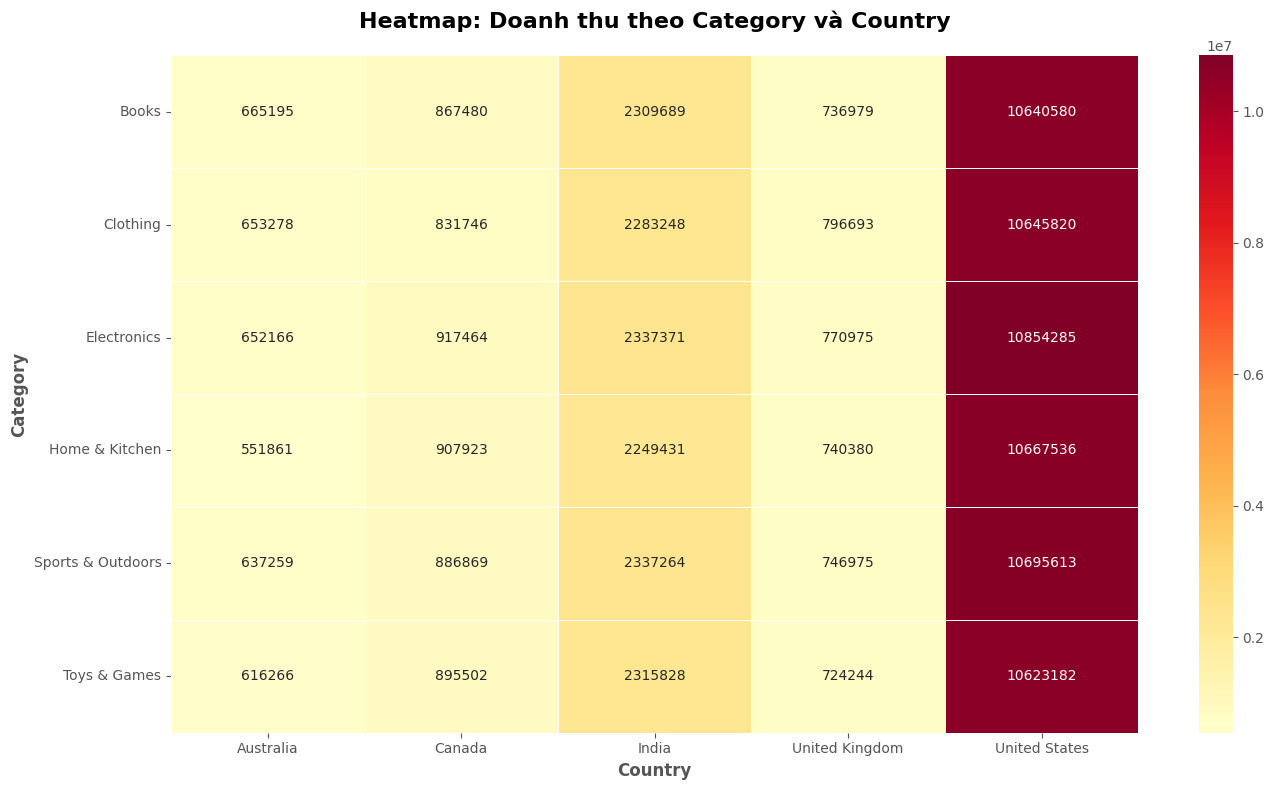

In [402]:
pivot_data = df.groupby(['Category', 'Country'])['TotalAmount'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap: Doanh thu theo Category và Country', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.tight_layout()
plt.show()

### 11. Xu hướng mua hàng theo danh mục của người tiêu dùng qua các năm

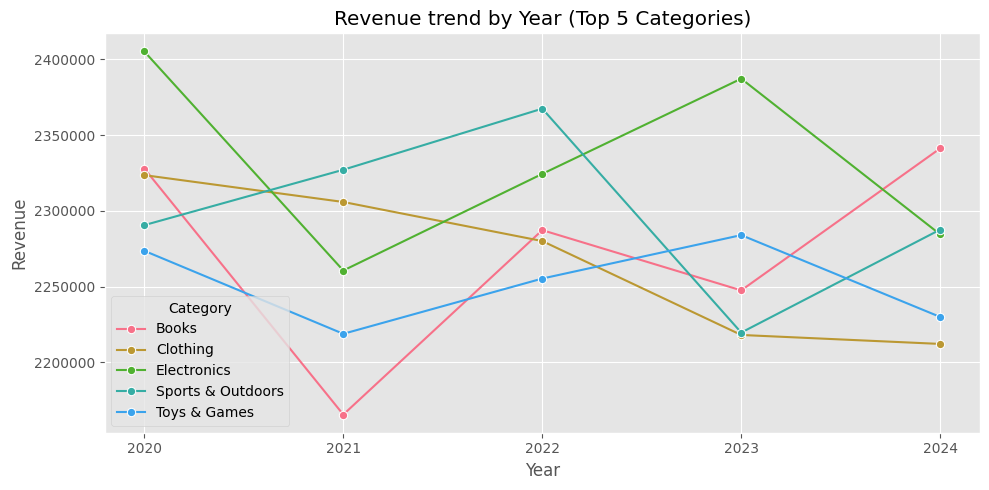

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

df = pd.read_csv("Amazon_SaleData.csv")

df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")
df = df.dropna(subset=["OrderDate"])
df["Year"] = df["OrderDate"].dt.year.astype(int)

df["TotalAmount"] = pd.to_numeric(df["TotalAmount"], errors="coerce")

df = df[df["OrderStatus"].eq("Delivered")]

year_cat = (
    df.groupby(["Year", "Category"])
      .agg(Orders=("OrderID", "nunique"), Revenue=("TotalAmount", "sum"))
      .reset_index()
)

K = 5
top_cats = (
    year_cat.groupby("Category")["Revenue"].sum()
            .nlargest(K).index
)
plot_df = year_cat[year_cat["Category"].isin(top_cats)]

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=plot_df, x="Year", y="Revenue", hue="Category", marker="o")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
ax.set_xticks(sorted(plot_df["Year"].unique()))       
ax.ticklabel_format(style="plain", axis="y", useOffset=False)  
plt.title(f"Revenue trend by Year (Top {K} Categories)")
plt.tight_layout()
plt.show()


- **Nhận xét:**
Trong giai đoạn 2020–2024, Electronics là danh mục có vai trò “xương sống”, duy trì doanh thu cao và tương đối ổn định; Clothing và Sports & Outdoors thể hiện các đợt “bùng nổ” mang tính thời điểm (đặc biệt 2021–2022), trong khi Books và Toys & Games giữ vai trò ổn định. Doanh nghiệp có thể xem Electronics là nhóm cần duy trì & tối ưu dài hạn, còn Clothing/Sports & Outdoors thích hợp cho các chiến dịch thời vụ / trend-based để tận dụng các giai đoạn nhu cầu tăng cao.

## 12. Phân tích ảnh hưởng của các cột đối với cột đích

PHÂN TÍCH TƯƠNG QUAN CỦA CÁC BIẾN TRONG DF ĐỐI VỚI REVENUE

Các cột số được phân tích: ['Revenue', 'Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount']

TƯƠNG QUAN CỦA CÁC BIẾN TRONG DF VỚI REVENUE:
Revenue         1.000000
TotalAmount     1.000000
Tax             0.778801
UnitPrice       0.716132
Quantity        0.595599
ShippingCost    0.038667
Discount       -0.105322
Name: Revenue, dtype: float64


PHÂN LOẠI MỨC ĐỘ TƯƠNG QUAN VỚI REVENUE:
  TotalAmount: 1.0000 (Tích cực, Rất mạnh)
  Tax: 0.7788 (Tích cực, Rất mạnh)
  UnitPrice: 0.7161 (Tích cực, Rất mạnh)
  Quantity: 0.5956 (Tích cực, Mạnh)
  ShippingCost: 0.0387 (Tích cực, Rất yếu)
  Discount: -0.1053 (Tiêu cực, Yếu)


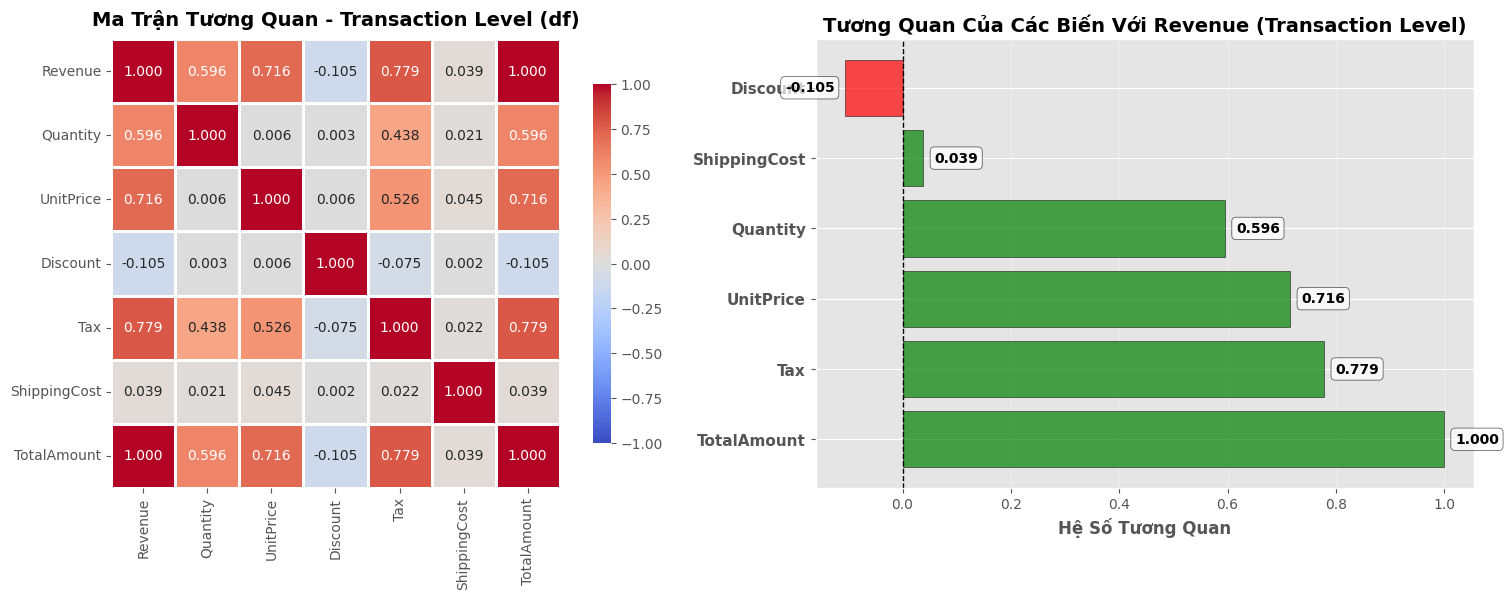


PHÂN TÍCH CHI TIẾT CÁC BIẾN CÓ TƯƠNG QUAN MẠNH VỚI REVENUE:

Có 4 biến có tương quan mạnh với Revenue:

  ** TotalAmount (r = 1.0000):
    - Mean: 916.18
    - Median: 712.32
    - Std: 723.41
    - Range: [4.27, 3514.24]

  ** Tax (r = 0.7788):
    - Mean: 68.19
    - Median: 45.06
    - Std: 73.90
    - Range: [0.00, 535.73]

  ** UnitPrice (r = 0.7161):
    - Mean: 302.57
    - Median: 302.96
    - Std: 171.92
    - Range: [5.01, 599.99]

  ** Quantity (r = 0.5956):
    - Mean: 3.00
    - Median: 3.00
    - Std: 1.41
    - Range: [1.00, 5.00]


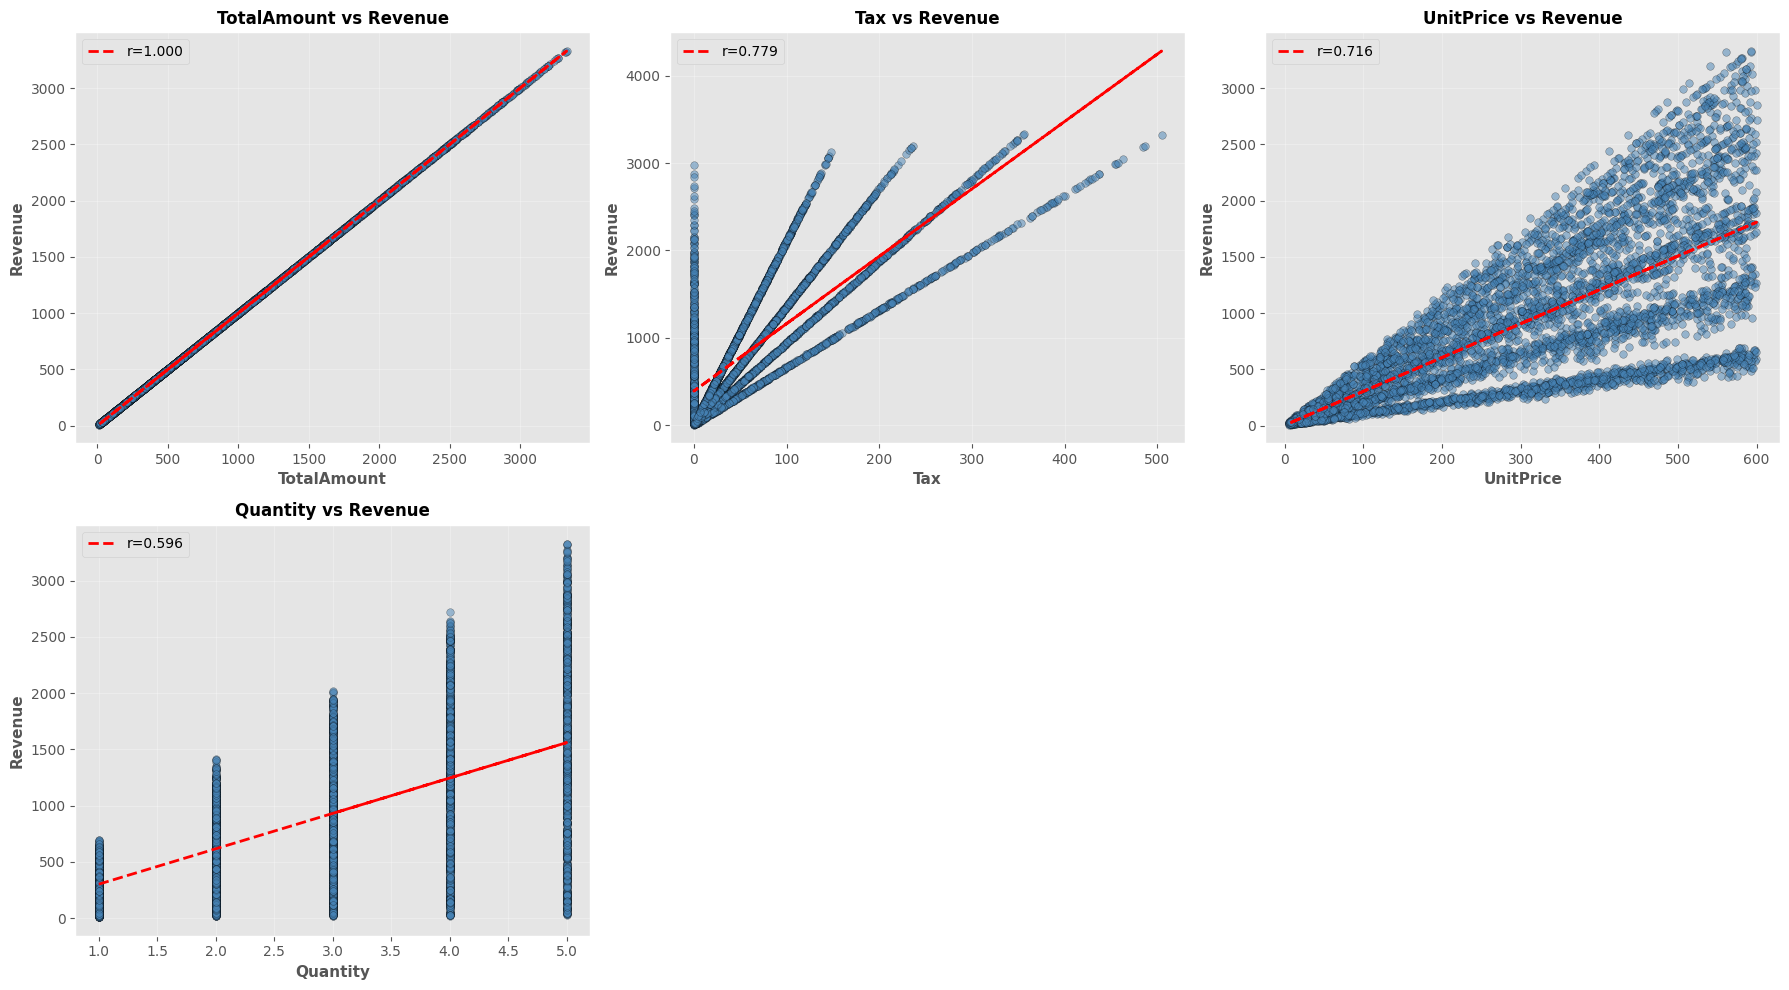

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df["Revenue"] = df["TotalAmount"]

print("PHÂN TÍCH TƯƠNG QUAN CỦA CÁC BIẾN TRONG DF ĐỐI VỚI REVENUE")

# 1. CHỌN CÁC BIẾN SỐ TỪ DF ĐỂ PHÂN TÍCH TƯƠNG QUAN
numeric_cols_df = [
    "Revenue",
    "Quantity",
    "UnitPrice",
    "Discount",
    "Tax",
    "ShippingCost",
    "TotalAmount",
]

# Lọc ra các cột số có trong df
available_cols = [col for col in numeric_cols_df if col in df.columns]
print(f"\nCác cột số được phân tích: {available_cols}")

# Tính ma trận tương quan
correlation_matrix_df = df[available_cols].corr()

# 2️. TRÍCH XUẤT TƯƠNG QUAN VỚI REVENUE
revenue_corr_df = correlation_matrix_df["Revenue"].sort_values(ascending=False)
print("\nTƯƠNG QUAN CỦA CÁC BIẾN TRONG DF VỚI REVENUE:")
print(revenue_corr_df)
print("\n" + "=" * 80)


# 3️. PHÂN LOẠI MỨC ĐỘ TƯƠNG QUAN
def classify_correlation(corr_value):
    abs_corr = abs(corr_value)
    if abs_corr >= 0.7:
        return "Rất mạnh"
    elif abs_corr >= 0.5:
        return "Mạnh"
    elif abs_corr >= 0.3:
        return "Trung bình"
    elif abs_corr >= 0.1:
        return "Yếu"
    else:
        return "Rất yếu"


print("\nPHÂN LOẠI MỨC ĐỘ TƯƠNG QUAN VỚI REVENUE:")
for var, corr in revenue_corr_df.items():
    if var != "Revenue":
        strength = classify_correlation(corr)
        direction = "Tích cực" if corr > 0 else "Tiêu cực"
        print(f"  {var}: {corr:.4f} ({direction}, {strength})")

# 4️. VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 4.1. Heatmap đầy đủ
sns.heatmap(
    correlation_matrix_df,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=axes[0],
    vmin=-1,
    vmax=1,
)
axes[0].set_title(
    "Ma Trận Tương Quan - Transaction Level (df)",
    fontweight="bold",
    fontsize=14,
    pad=10,
)

# 4.2. Bar chart: Tương quan với Revenue
revenue_corr_filtered_df = revenue_corr_df.drop("Revenue")
colors = ["red" if x < 0 else "green" for x in revenue_corr_filtered_df.values]

axes[1].barh(
    range(len(revenue_corr_filtered_df)),
    revenue_corr_filtered_df.values,
    color=colors,
    alpha=0.7,
    edgecolor="black",
)
axes[1].set_yticks(range(len(revenue_corr_filtered_df)))
axes[1].set_yticklabels(revenue_corr_filtered_df.index, fontweight="bold", fontsize=11)
axes[1].axvline(x=0, color="black", linestyle="--", linewidth=1)
axes[1].set_xlabel("Hệ Số Tương Quan", fontweight="bold", fontsize=12)
axes[1].set_title(
    "Tương Quan Của Các Biến Với Revenue (Transaction Level)",
    fontweight="bold",
    fontsize=14,
)
axes[1].grid(True, alpha=0.3, axis="x")

# Thêm giá trị vào bar chart
for i, (var, corr) in enumerate(revenue_corr_filtered_df.items()):
    x_pos = corr + (0.02 if corr > 0 else -0.02)
    ha = "left" if corr > 0 else "right"
    axes[1].text(
        x_pos,
        i,
        f"{corr:.3f}",
        ha=ha,
        va="center",
        fontweight="bold",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round", alpha=0.7),
    )

plt.tight_layout()
plt.show()

# 5️. PHÂN TÍCH CHI TIẾT CÁC BIẾN CÓ TƯƠNG QUAN MẠNH
print("\n" + "=" * 80)
print("PHÂN TÍCH CHI TIẾT CÁC BIẾN CÓ TƯƠNG QUAN MẠNH VỚI REVENUE:")

strong_corr_vars_df = revenue_corr_filtered_df[abs(revenue_corr_filtered_df) >= 0.5]

if len(strong_corr_vars_df) > 0:
    print(f"\nCó {len(strong_corr_vars_df)} biến có tương quan mạnh với Revenue:")
    for var, corr in strong_corr_vars_df.items():
        print(f"\n  ** {var} (r = {corr:.4f}):")
        print(f"    - Mean: {df[var].mean():.2f}")
        print(f"    - Median: {df[var].median():.2f}")
        print(f"    - Std: {df[var].std():.2f}")
        print(f"    - Range: [{df[var].min():.2f}, {df[var].max():.2f}]")
else:
    print("Không có biến nào có tương quan mạnh (|corr| >= 0.5) với Revenue.")

# 6️. SCATTER PLOTS CHO CÁC BIẾN CÓ TƯƠNG QUAN CAO
strong_vars_df = [var for var in strong_corr_vars_df.index if var != "Revenue"]

if len(strong_vars_df) > 0:
    # Lấy mẫu để tránh quá tải visualization
    df_sample = df.sample(n=min(5000, len(df)), random_state=42)

    n_vars = len(strong_vars_df)
    n_cols = min(3, n_vars)
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_vars > 1 else [axes]

    for idx, var in enumerate(strong_vars_df):
        axes[idx].scatter(
            df_sample[var],
            df_sample["Revenue"],
            alpha=0.5,
            s=30,
            color="steelblue",
            edgecolors="black",
            linewidth=0.3,
        )

        from scipy import stats

        slope, intercept, r_value, p_value, std_err = stats.linregress(df_sample[var], df_sample["Revenue"])
        line = slope * df_sample[var] + intercept
        axes[idx].plot(df_sample[var], line, "r--", linewidth=2, label=f"r={revenue_corr_filtered_df[var]:.3f}")

        axes[idx].set_xlabel(var, fontweight="bold", fontsize=11)
        axes[idx].set_ylabel("Revenue", fontweight="bold", fontsize=11)
        axes[idx].set_title(f"{var} vs Revenue", fontweight="bold", fontsize=12)
        axes[idx].legend(loc="best", fontsize=10)
        axes[idx].grid(True, alpha=0.3)

    for idx in range(len(strong_vars_df), len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()


## 13. Phân tích phương sai (ANOVA)

In [405]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

cat_cols = [
    "PaymentMethod",
    "Category",
    "Brand",
    "City",
    "State",
    "Country",
    "OrderStatus",  # (tuỳ: nếu target Revenue đã phụ thuộc status thì biến này sẽ “áp đảo”)
    "DayOfWeek",
    "DayOfMonth",
    "Month",
]

anova_rows = []
for c in cat_cols:
    tmp = df[[c, "Revenue"]].dropna()
    if tmp[c].nunique() < 2:
        continue
    m = smf.ols(f"Revenue ~ C({c})", data=tmp).fit()
    a = sm.stats.anova_lm(m, typ=2)
    p = a.loc[f"C({c})", "PR(>F)"]
    f = a.loc[f"C({c})", "F"]
    anova_rows.append(
        {"feature": c, "F_stat": f, "p_value": p, "n_categories": tmp[c].nunique()}
    )

anova_df = pd.DataFrame(anova_rows).sort_values("p_value")
anova_df

KeyError: "['DayOfWeek'] not in index"

In [ ]:
df_del = df[df["OrderStatus"] == "Delivered"].copy()


anova_rows = []
for c in cat_cols:
    tmp = df_del[[c, "Revenue"]].dropna()
    if tmp[c].nunique() < 2:
        continue
    m = smf.ols(f"Revenue ~ C({c})", data=tmp).fit()
    a = sm.stats.anova_lm(m, typ=2)
    p = a.loc[f"C({c})", "PR(>F)"]
    f = a.loc[f"C({c})", "F"]
    anova_rows.append(
        {"feature": c, "F_stat": f, "p_value": p, "n_categories": tmp[c].nunique()}
    )

anova_df = pd.DataFrame(anova_rows).sort_values("p_value")
anova_df

,feature,F_stat,p_value,n_categories
2,Brand,2.254050,0.016235,10
1,Category,0.959203,0.441286,6
4,State,0.985978,0.459298,13
0,PaymentMethod,0.714896,0.612151,6
6,DayOfWeek,0.654566,0.686501,7
3,City,0.771969,0.743474,20
8,Month,0.685263,0.753996,12
5,Country,0.260160,0.903571,5
7,DayOfMonth,0.676126,0.908913,31


## 14. Nhóm các đơn hàng theo tuần để dự đoán doanh thu sau này

In [ ]:
df = pd.read_csv("Amazon_SaleData_Cleaned.csv")

df["OrderDate"] = pd.to_datetime(df["OrderDate"])

df["Year"] = df["OrderDate"].dt.year
df["Month"] = df["OrderDate"].dt.month
df["Quarter"] = df["OrderDate"].dt.quarter
df["YearMonth"] = df["OrderDate"].dt.to_period("M")
df["DayOfWeek"] = df["OrderDate"].dt.day_name()
df["MonthName"] = df["OrderDate"].dt.month_name()
df["DayOfMonth"] = df["OrderDate"].dt.day
holidays = pd.to_datetime(
    [
        # New Year
        "2020-01-01",
        "2021-01-01",
        "2022-01-01",
        "2023-01-01",
        "2024-01-01",
        # Christmas Eve & Christmas
        "2020-12-24",
        "2020-12-25",
        "2021-12-24",
        "2021-12-25",
        "2022-12-24",
        "2022-12-25",
        "2023-12-24",
        "2023-12-25",
        "2024-12-24",
        "2024-12-25",
        # Black Friday
        "2020-11-27",
        "2021-11-26",
        "2022-11-25",
        "2023-11-24",
        "2024-11-29",
        # Cyber Monday (Black Friday + 3 days)
        "2020-11-30",
        "2021-11-29",
        "2022-11-28",
        "2023-11-27",
        "2024-12-02",
    ]
)

# Tạo cột holiday flag
df["is_holiday"] = df["OrderDate"].dt.date.isin(holidays.date).astype(int)

# Tính toán các metrics bổ sung

print(f"Dataset shape: {df.shape}")
print(f"Thời gian: {df['OrderDate'].min()} đến {df['OrderDate'].max()}")
print(f"\nĐã tải dữ liệu và tạo các biến phụ trợ thành công!")
df.head(10)

Dataset shape: (100000, 30)
Thời gian: 2020-01-01 00:00:00 đến 2024-12-29 00:00:00

Đã tải dữ liệu và tạo các biến phụ trợ thành công!


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,day_of_week,Revenue,Year,Month,Quarter,YearMonth,DayOfWeek,MonthName,DayOfMonth,is_holiday
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,1,319.86,2023,1,1,2023-01,Tuesday,January,31,0
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,5,259.64,2023,12,4,2023-12,Saturday,December,30,0
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,1,108.06,2022,5,2,2022-05,Tuesday,May,10,0
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,1,159.66,2023,7,3,2023-07,Tuesday,July,18,0
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,5,0.00,2023,2,1,2023-02,Saturday,February,4,0
5,ORD0000006,2022-12-31,CUST042705,Karan Sharma,P00023,Cookware Set,Books,ReadMore,4,449.73,...,5,2017.53,2022,12,4,2022-12,Saturday,December,31,0
6,ORD0000007,2024-09-20,CUST037667,Aarav Verma,P00030,Dress Shirt,Clothing,UrbanStyle,2,219.81,...,4,394.81,2024,9,3,2024-09,Friday,September,20,0
7,ORD0000008,2022-11-10,CUST031165,Rohit Kumar,P00028,Jeans,Toys & Games,KiddoFun,2,306.51,...,3,0.00,2022,11,4,2022-11,Thursday,November,10,0
8,ORD0000009,2024-06-26,CUST026965,Aman Kapoor,P00031,Kids Toy Car,Sports & Outdoors,Apex,4,146.09,...,2,638.14,2024,6,2,2024-06,Wednesday,June,26,0
9,ORD0000010,2020-05-01,CUST029472,Aarav Reddy,P00001,Wireless Earbuds,Clothing,Apex,2,278.21,...,4,565.75,2020,5,2,2020-05,Friday,May,1,0


In [ ]:
import pandas as pd
import numpy as np

# 1️. ONE-HOT ENCODE + AGGREGATE BY WEEK
categorical_cols = ["Category", "PaymentMethod", "Country"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

df_encoded["RealizedRevenue"] = np.where(
    df_encoded["OrderStatus"] == "Delivered", df_encoded["TotalAmount"], 0
)
df_encoded["week"] = df_encoded["OrderDate"].dt.to_period("W")

dummy_cols = [
    col
    for col in df_encoded.columns
    if any(col.startswith(f"{prefix}_") for prefix in categorical_cols)
]

# 2️. AGGREGATE BY WEEK
agg_dict = {
    "RealizedRevenue": "sum",
    "OrderID": "nunique",
    "Quantity": "sum",
    "Discount": "mean",
    "OrderStatus": lambda x: (x == "Delivered").sum() / len(x),
}
# Thêm dummy columns
for col in dummy_cols:
    agg_dict[col] = "sum"

weekly_full = df_encoded.groupby("week").agg(agg_dict).reset_index()
weekly_full.rename(
    columns={
        "RealizedRevenue": "Revenue",
        "OrderID": "Orders",
        "OrderStatus": "DeliveryRate",
        "Discount": "AvgDiscount",
    },
    inplace=True,
)

# 3️. THÊM HOLIDAY FEATURES
holiday_days = (
    df_encoded[df_encoded["is_holiday"] == 1]
    .groupby("week")["OrderDate"]
    .apply(lambda x: x.dt.date.nunique())
    .reset_index()
    .rename(columns={"OrderDate": "HolidayDays"})
)

holiday_revenue = (
    df_encoded[df_encoded["is_holiday"] == 1]
    .groupby("week")["RealizedRevenue"]
    .sum()
    .reset_index()
    .rename(columns={"RealizedRevenue": "HolidayRevenue"})
)

weekly_full = weekly_full.merge(holiday_days, on="week", how="left")
weekly_full = weekly_full.merge(holiday_revenue, on="week", how="left")
weekly_full["HolidayDays"] = weekly_full["HolidayDays"].fillna(0).astype(int)
weekly_full["HolidayRevenue"] = weekly_full["HolidayRevenue"].fillna(0)
weekly_full["has_holiday"] = (weekly_full["HolidayDays"] > 0).astype(int)

# 4️. SUMMARY
all_features = [col for col in weekly_full.columns if col not in ["week", "Revenue"]]

print(f"   Weekly dataset created: {weekly_full.shape}")
print(f"   Column include {weekly_full.columns}")
print(f"   Features: {len(all_features)} | Weeks: {len(weekly_full)}")
print(f"   Missing values: {weekly_full.isnull().sum().sum()}")

weekly_full.head(10)
weekly_full.to_csv("Amazon_Weekly_Revenue.csv", index=False)

   Weekly dataset created: (261, 26)
   Column include Index(['week', 'Revenue', 'Orders', 'Quantity', 'AvgDiscount', 'DeliveryRate',
       'Category_Books', 'Category_Clothing', 'Category_Electronics',
       'Category_Home & Kitchen', 'Category_Sports & Outdoors',
       'Category_Toys & Games', 'PaymentMethod_Amazon Pay',
       'PaymentMethod_Cash On Delivery', 'PaymentMethod_Credit Card',
       'PaymentMethod_Debit Card', 'PaymentMethod_Net Banking',
       'PaymentMethod_Upi', 'Country_Australia', 'Country_Canada',
       'Country_India', 'Country_United Kingdom', 'Country_United States',
       'HolidayDays', 'HolidayRevenue', 'has_holiday'],
      dtype='object')
   Features: 24 | Weeks: 261
   Missing values: 0


### Phân tích tương quan 

PHAN TICH TUONG QUAN WEEKLY DATASET (VOI P-VALUE & COEFFICIENT)


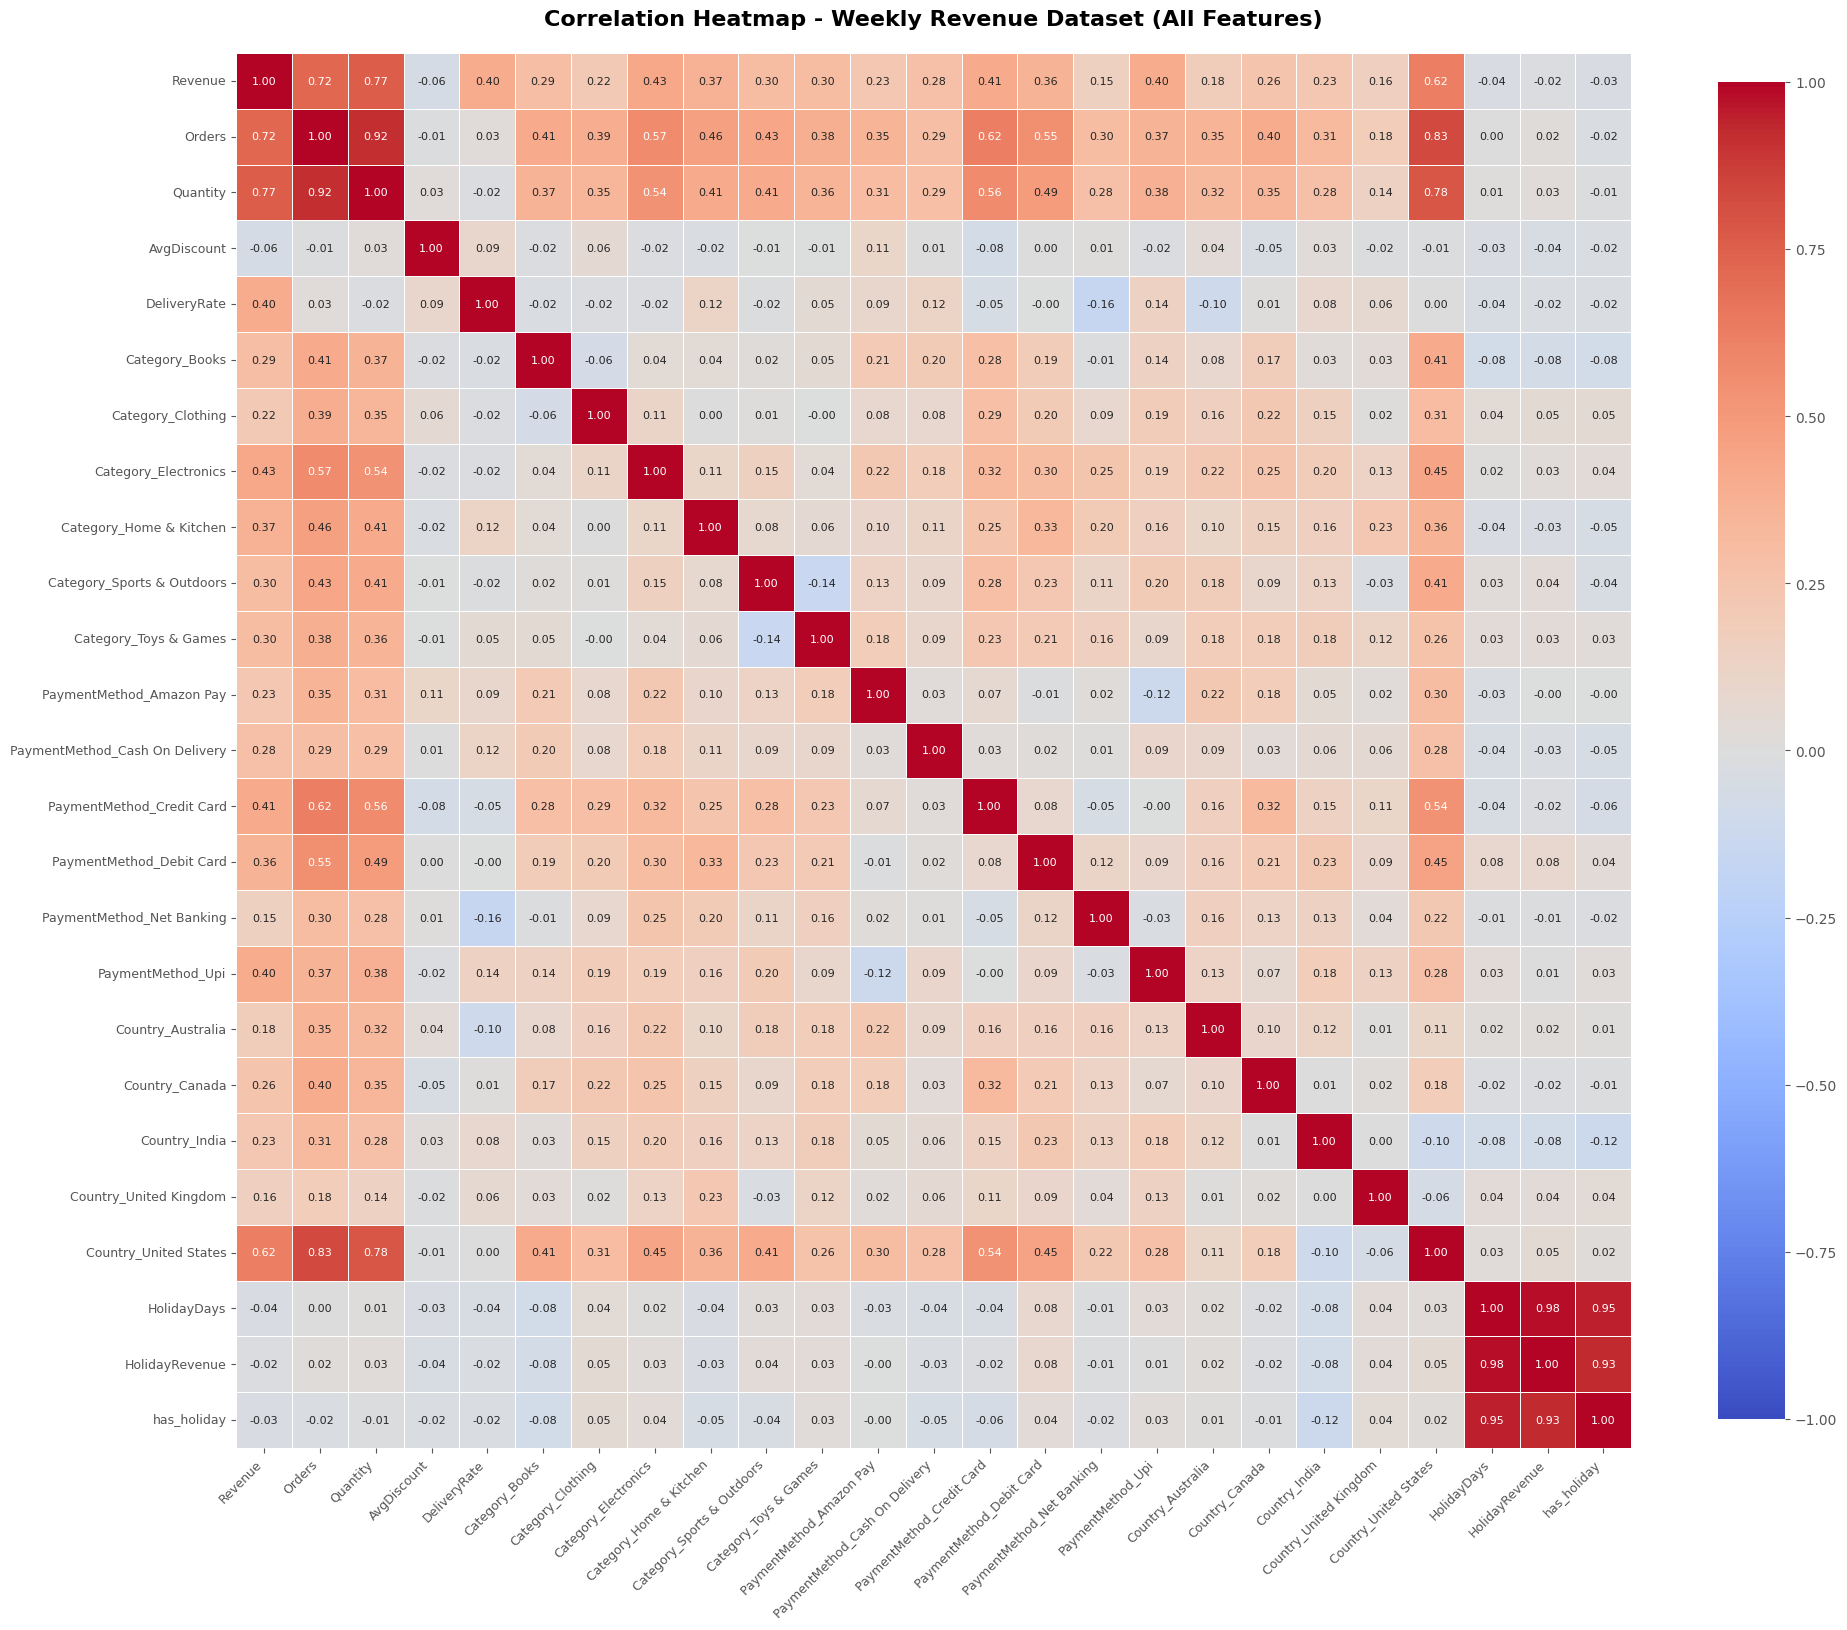

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

print("PHAN TICH TUONG QUAN WEEKLY DATASET (VOI P-VALUE & COEFFICIENT)")

# 1. Chon cac features de phan tich (loai bo 'week')
correlation_cols = [col for col in weekly_full.columns if col != "week"]

# Tinh ma tran tuong quan
weekly_corr = weekly_full[correlation_cols].corr()

# 2. HEATMAP TUONG QUAN DAY DU
plt.figure(figsize=(20, 18))
sns.heatmap(
    weekly_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
    annot_kws={"fontsize": 8},
)
plt.title(
    "Correlation Heatmap - Weekly Revenue Dataset (All Features)",
    fontweight="bold",
    fontsize=16,
    pad=20,
)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

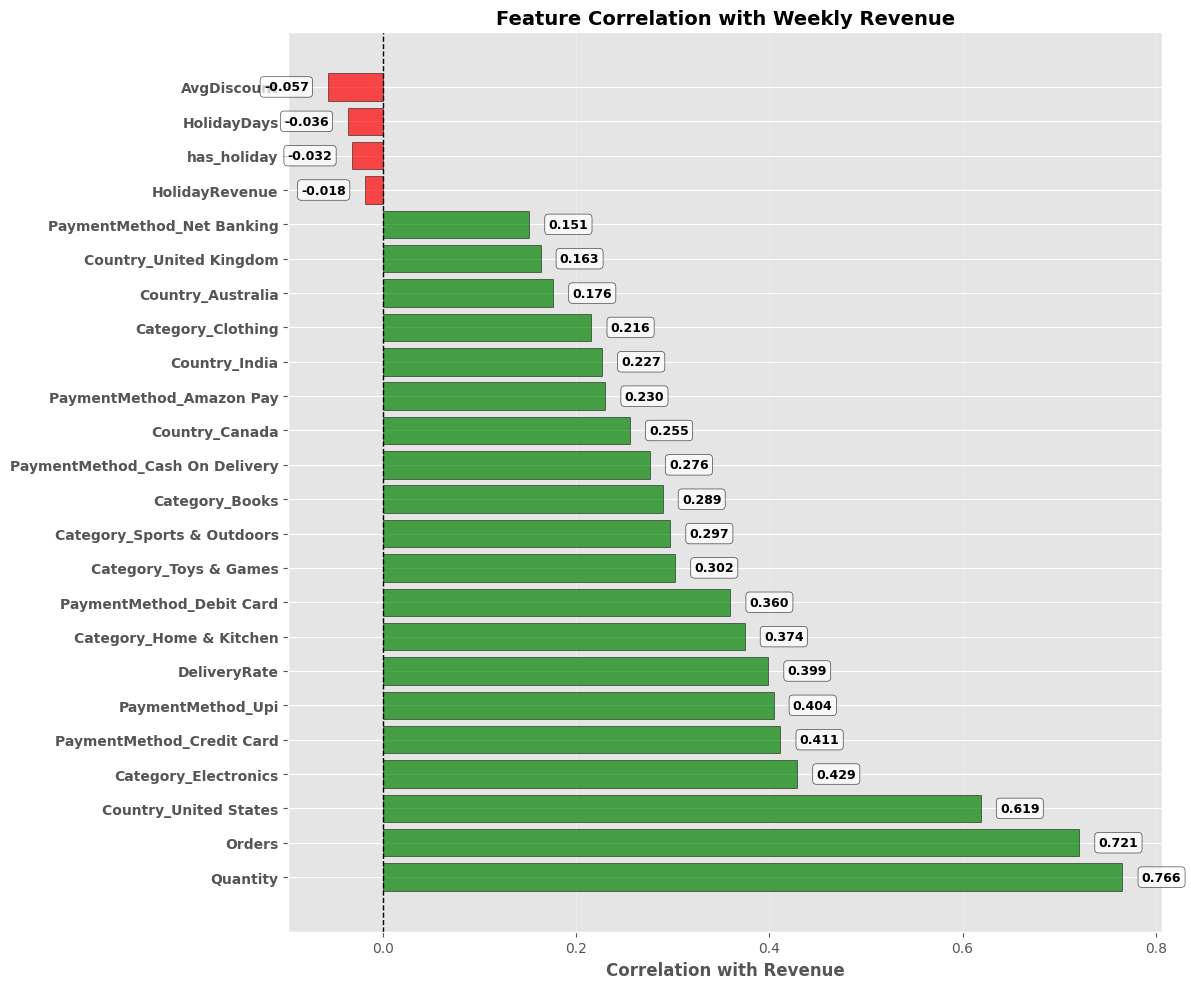

In [ ]:
# 3. HEATMAP TUONG QUAN VOI REVENUE
revenue_corr = weekly_corr["Revenue"].sort_values(ascending=False)
revenue_corr_filtered = revenue_corr.drop("Revenue")

# Ve bar chart
fig, ax = plt.subplots(figsize=(12, 10))
colors = ["red" if x < 0 else "green" for x in revenue_corr_filtered.values]

ax.barh(
    range(len(revenue_corr_filtered)),
    revenue_corr_filtered.values,
    color=colors,
    alpha=0.7,
    edgecolor="black",
)
ax.set_yticks(range(len(revenue_corr_filtered)))
ax.set_yticklabels(revenue_corr_filtered.index, fontweight="bold", fontsize=10)
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)
ax.set_xlabel("Correlation with Revenue", fontweight="bold", fontsize=12)
ax.set_title("Feature Correlation with Weekly Revenue", fontweight="bold", fontsize=14)
ax.grid(True, alpha=0.3, axis="x")

for i, (var, corr) in enumerate(revenue_corr_filtered.items()):
    x_pos = corr + (0.02 if corr > 0 else -0.02)
    ha = "left" if corr > 0 else "right"
    ax.text(
        x_pos,
        i,
        f"{corr:.3f}",
        ha=ha,
        va="center",
        fontweight="bold",
        fontsize=9,
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round", alpha=0.7),
    )

plt.tight_layout()
plt.show()

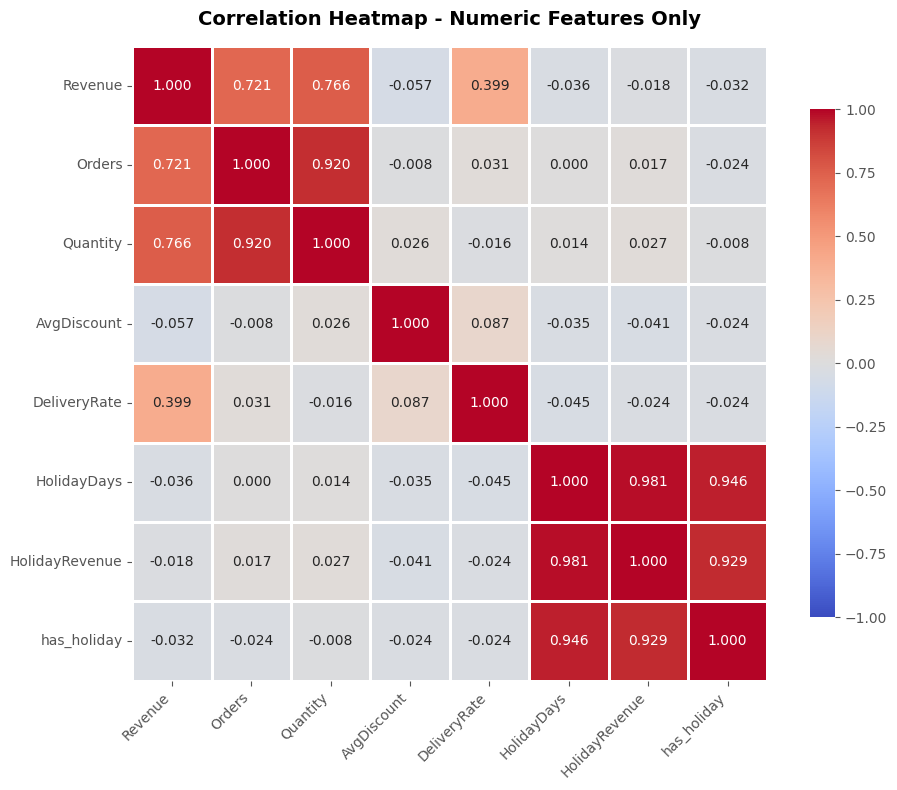

In [ ]:
# 4. HEATMAP CHO NUMERIC FEATURES
numeric_features = [
    "Revenue",
    "Orders",
    "Quantity",
    "AvgDiscount",
    "DeliveryRate",
    "HolidayDays",
    "HolidayRevenue",
    "has_holiday",
]

numeric_corr = weekly_full[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_corr,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Heatmap - Numeric Features Only", fontweight="bold", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# 5. TAO SUMMARY TABLE VOI P-VALUE VA COEFFICIENT
def classify_correlation(corr_value):
    abs_corr = abs(corr_value)
    if abs_corr >= 0.7:
        return "Very Strong"
    elif abs_corr >= 0.5:
        return "Strong"
    elif abs_corr >= 0.3:
        return "Moderate"
    elif abs_corr >= 0.1:
        return "Weak"
    else:
        return "Very Weak"


# Tao DataFrame summary voi p-value va coefficient
summary_data = []
for var in revenue_corr_filtered.index:
    # Loai bo missing values
    valid_data = weekly_full[[var, "Revenue"]].dropna()

    if len(valid_data) > 2:
        # Tinh Pearson correlation va p-value
        corr_coef, p_value = pearsonr(valid_data[var], valid_data["Revenue"])

        # Tinh linear regression coefficient
        X = valid_data[[var]].values
        y = valid_data["Revenue"].values

        lr_model = LinearRegression()
        lr_model.fit(X, y)
        reg_coef = lr_model.coef_[0]
        intercept = lr_model.intercept_

        # Tinh R-squared
        r_squared = corr_coef**2

        # Danh gia significance
        if p_value < 0.001:
            significance = "***"
        elif p_value < 0.01:
            significance = "**"
        elif p_value < 0.05:
            significance = "*"
        else:
            significance = "NS"

        summary_data.append(
            {
                "Feature": var,
                "Correlation": corr_coef,
                "P_value": p_value,
                "Reg_Coefficient": reg_coef,
                "Intercept": intercept,
                "R_squared": r_squared,
                "Abs_Correlation": abs(corr_coef),
                "Direction": "Positive" if corr_coef > 0 else "Negative",
                "Strength": classify_correlation(corr_coef),
                "Significance": significance,
                "N_samples": len(valid_data),
            }
        )

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values("Abs_Correlation", ascending=False)

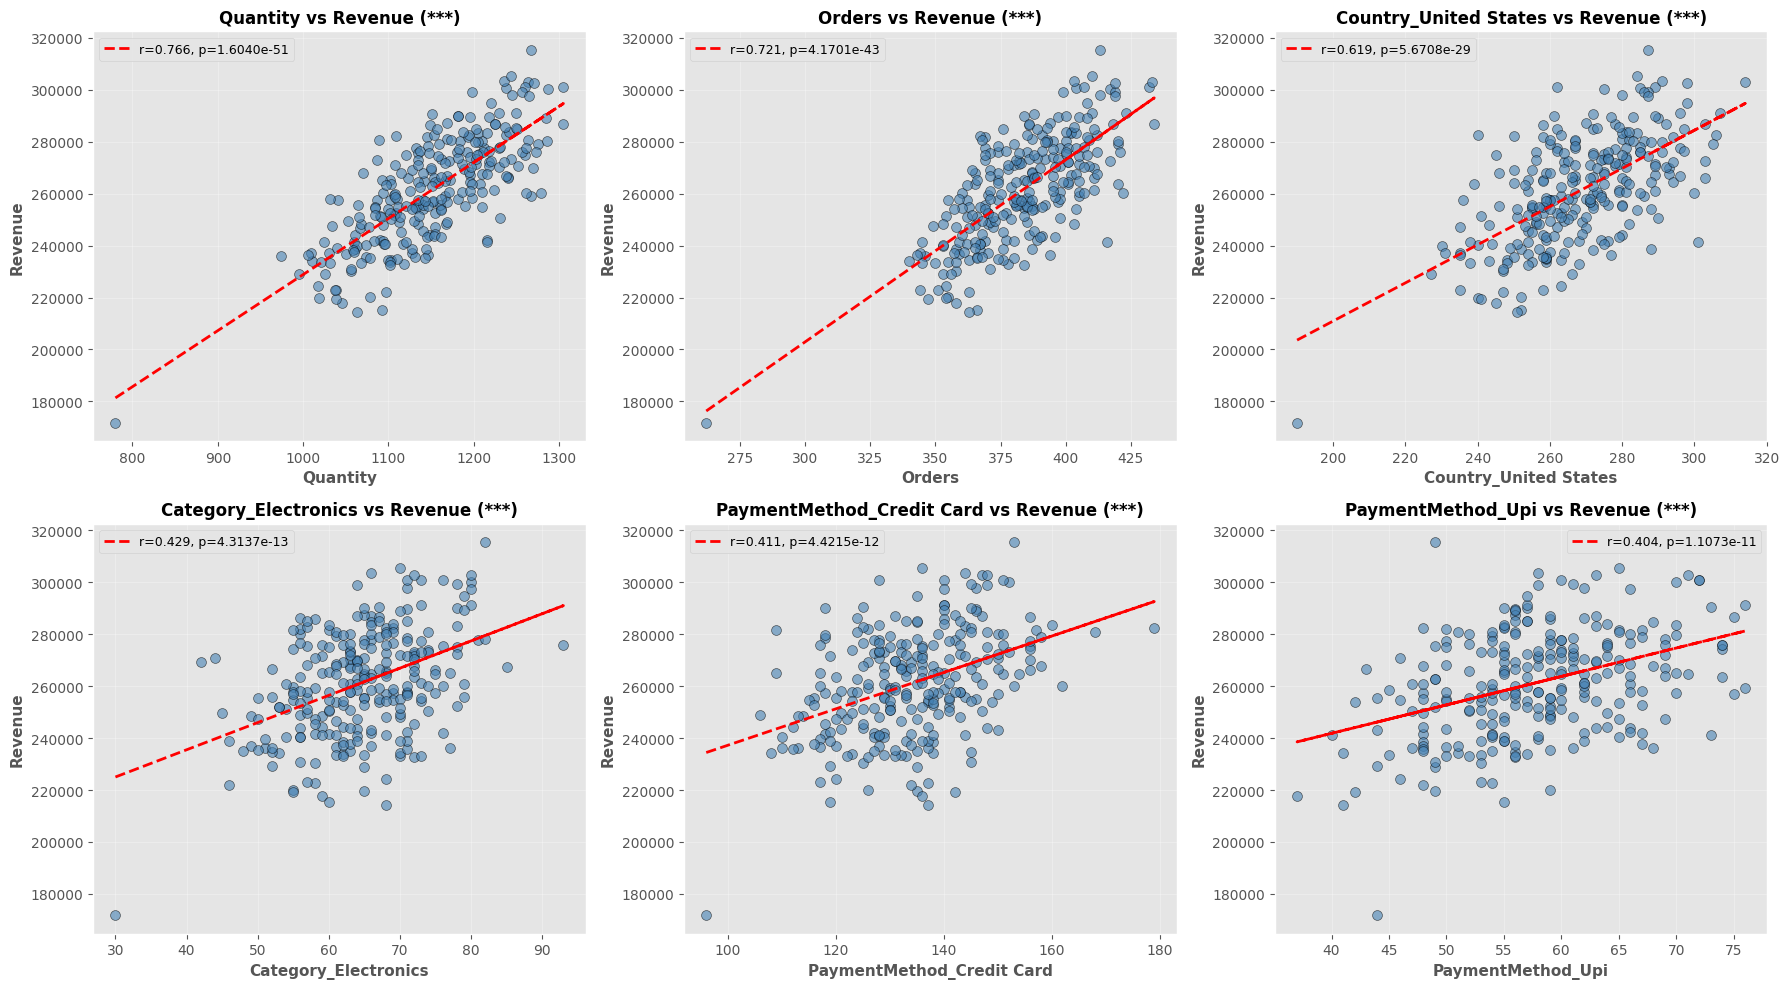

In [ ]:
# 6. SCATTER PLOTS CHO 6 BIEN DAU TIEN CO Y NGHIA THONG KE (p < 0.05)
significant_vars_list = summary_df[summary_df["P_value"] < 0.05]["Feature"].tolist()[:6]

if len(significant_vars_list) > 0:
    n_vars = len(significant_vars_list)
    n_cols = 3
    n_rows = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
    axes = axes.flatten()

    for idx, var in enumerate(significant_vars_list):
        # Lay du lieu hop le
        valid_data = weekly_full[[var, "Revenue"]].dropna()

        # Ve scatter plot
        axes[idx].scatter(
            valid_data[var],
            valid_data["Revenue"],
            alpha=0.6,
            s=50,
            color="steelblue",
            edgecolors="black",
            linewidth=0.5,
        )

        # Them regression line
        from scipy import stats

        slope, intercept, r_value, p_value, std_err = stats.linregress(
            valid_data[var], valid_data["Revenue"]
        )
        line = slope * valid_data[var] + intercept

        # Lay thong tin tu summary_df
        row_info = summary_df[summary_df["Feature"] == var].iloc[0]

        axes[idx].plot(
            valid_data[var],
            line,
            "r--",
            linewidth=2,
            label=f"r={row_info['Correlation']:.3f}, p={row_info['P_value']:.4e}",
        )

        axes[idx].set_xlabel(var, fontweight="bold", fontsize=11)
        axes[idx].set_ylabel("Revenue", fontweight="bold", fontsize=11)
        axes[idx].set_title(
            f"{var} vs Revenue ({row_info['Significance']})",
            fontweight="bold",
            fontsize=12,
        )
        axes[idx].legend(loc="best", fontsize=9)
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

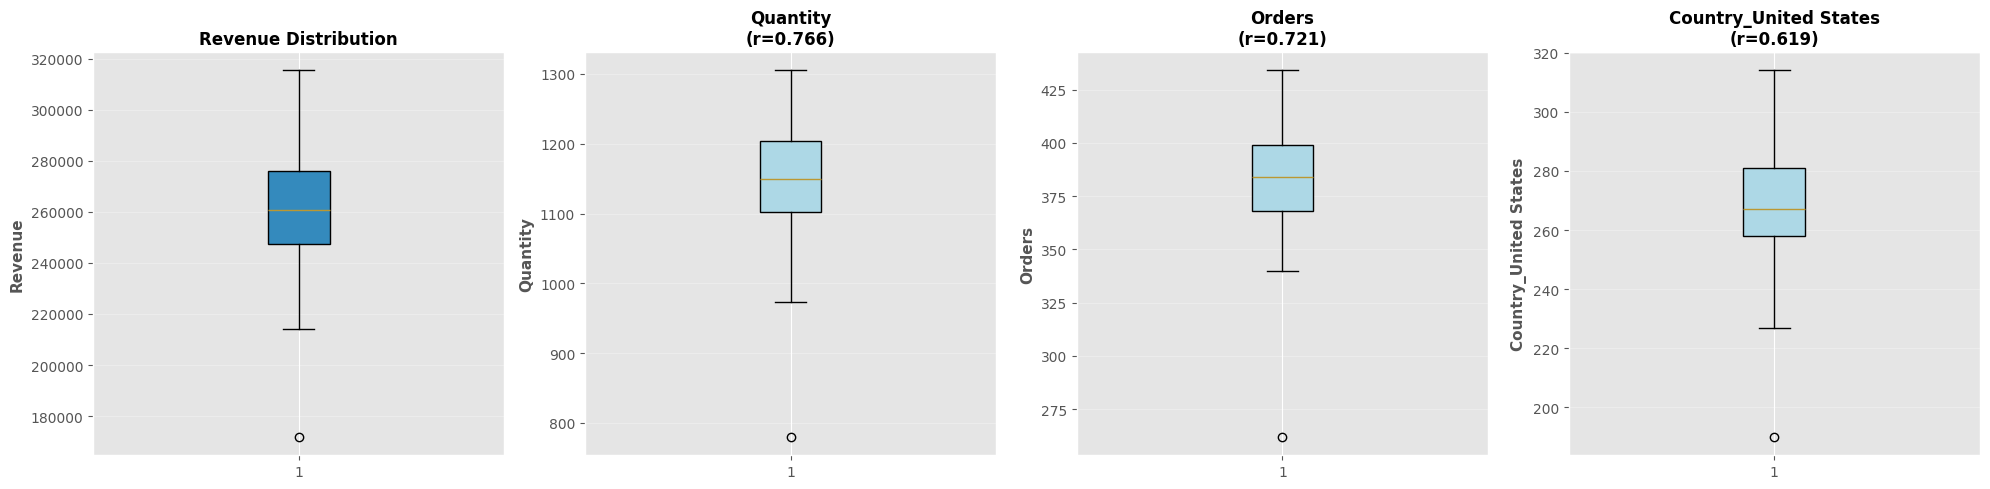

In [ ]:
# 7. BOX PLOTS CHO CAC BIEN CO TUONG QUAN MANH (|r| >= 0.5)
strong_vars_list = summary_df[summary_df["Abs_Correlation"] >= 0.5]["Feature"].tolist()

if len(strong_vars_list) > 0:
    fig, axes = plt.subplots(
        1, len(strong_vars_list) + 1, figsize=(5 * (len(strong_vars_list) + 1), 5)
    )

    if len(strong_vars_list) == 0:
        axes = [axes]

    # Box plot cho Revenue
    axes[0].boxplot(weekly_full["Revenue"].dropna(), vert=True, patch_artist=True)
    axes[0].set_ylabel("Revenue", fontweight="bold", fontsize=11)
    axes[0].set_title("Revenue Distribution", fontweight="bold", fontsize=12)
    axes[0].grid(True, alpha=0.3, axis="y")

    # Box plots cho cac bien tuong quan manh
    for idx, var in enumerate(strong_vars_list, 1):
        bp = axes[idx].boxplot(weekly_full[var].dropna(), vert=True, patch_artist=True)
        bp["boxes"][0].set_facecolor("lightblue")

        axes[idx].set_ylabel(var, fontweight="bold", fontsize=11)

        row_info = summary_df[summary_df["Feature"] == var].iloc[0]
        axes[idx].set_title(
            f"{var}\n(r={row_info['Correlation']:.3f})",
            fontweight="bold",
            fontsize=12,
        )
        axes[idx].grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()

In [ ]:
# 8. IN BANG TONG HOP CHI TIET (CUOI CUNG)
print("BANG TONG HOP CHI TIET (VOI P-VALUE & COEFFICIENT)")
print("--" * 30)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
print(summary_df.to_string(index=False))

BANG TONG HOP CHI TIET (VOI P-VALUE & COEFFICIENT)
------------------------------------------------------------
                       Feature  Correlation      P_value  Reg_Coefficient     Intercept  R_squared  Abs_Correlation Direction    Strength Significance  N_samples
                      Quantity     0.765536 1.604035e-51       215.923774  12922.002977   0.586045         0.765536  Positive Very Strong          ***        261
                        Orders     0.720732 4.170145e-43       701.025030  -7365.895438   0.519455         0.720732  Positive Very Strong          ***        261
         Country_United States     0.618772 5.670761e-29       734.832376  63981.293723   0.382879         0.618772  Positive      Strong          ***        261
          Category_Electronics     0.428692 4.313729e-13      1047.608466 193581.068148   0.183777         0.428692  Positive    Moderate          ***        261
     PaymentMethod_Credit Card     0.411376 4.421512e-12       700.502855 1671